# CF Gap Code
figure 3, 7

In [1]:
# Install Libertinus fonts manually from GitHub release
!wget https://github.com/alerque/libertinus/releases/download/v7.040/Libertinus-7.040.zip
!unzip -q -o Libertinus-7.040.zip
!mkdir -p /usr/share/fonts/opentype/libertinus
# Copy OTF files to system fonts directory
!find Libertinus-7.040 -name "*.otf" -exec cp {} /usr/share/fonts/opentype/libertinus/ \;

# Rebuild the font cache
!fc-cache -fv

# Verify installation
!fc-list | grep -i libertinus

--2026-01-14 02:34:37--  https://github.com/alerque/libertinus/releases/download/v7.040/Libertinus-7.040.zip
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/10892932/63594680-783f-11eb-82db-8ef79e89c995?sp=r&sv=2018-11-09&sr=b&spr=https&se=2026-01-14T03%3A27%3A58Z&rscd=attachment%3B+filename%3DLibertinus-7.040.zip&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2026-01-14T02%3A27%3A01Z&ske=2026-01-14T03%3A27%3A58Z&sks=b&skv=2018-11-09&sig=zG7jNOgRcBHRZCOOJGGAxfg2cj20BgUbgEcIpBOCXhw%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc2ODM1ODM3NywibmJmIjoxNzY4MzU4MDc3LCJwYXRoIjoicmVsZWFzZWFzc2V0cHJvZHVjdG

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.font_manager as fm
from matplotlib.colors import LinearSegmentedColormap

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=256):
    return LinearSegmentedColormap.from_list(
        f"trunc({cmap.name},{minval:.2f},{maxval:.2f})",
        cmap(np.linspace(minval, maxval, n))
    )

# Reload font manager to pick up newly installed system fonts
fm._load_fontmanager(try_read_cache=False)

# Use Libertine in your plots
plt.rcParams['font.family'] = 'Libertinus Serif'
plt.rcParams['font.size'] = 9

# --- Debugging step: check if font is found ---
try:
    # Explicitly set fallback_to_default=False to accurately check if the font is found
    font_path = fm.findfont('Libertinus Serif', fallback_to_default=False)
    print(f"Path to Libertinus Serif: {font_path}")
except ValueError:
    print("WARNING: Libertinus Serif font not found by Matplotlib even after reload.")
    # As a last resort, try adding the font manually if it exists on disk
    try:
        libertinus_serif_path = "/usr/share/fonts/opentype/libertinus/LibertinusSerif-Regular.otf"
        if os.path.exists(libertinus_serif_path):
            fm.fontManager.addfont(libertinus_serif_path)
            # Re-check if it's found after adding
            try:
                font_path_after_add = fm.findfont('Libertinus Serif', fallback_to_default=False)
                print(f"Path to Libertinus Serif after manual add: {font_path_after_add}")
                plt.rcParams['font.family'] = 'Libertinus Serif'
                print("Libertinus Serif added and set successfully after manual intervention.")
            except ValueError:
                 print("ERROR: Libertinus Serif still not found after manual add, even with direct path.")
        else:
            print(f"ERROR: Expected font file not found: {libertinus_serif_path}")
    except Exception as e:
        print(f"Error during manual font add: {e}")

Path to Libertinus Serif after manual add: /usr/share/fonts/opentype/libertinus/LibertinusSerif-Regular.otf
Libertinus Serif added and set successfully after manual intervention.


In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.font_manager as fm
from matplotlib.colors import LinearSegmentedColormap

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=256):
    return LinearSegmentedColormap.from_list(
        f"trunc({cmap.name},{minval:.2f},{maxval:.2f})",
        cmap(np.linspace(minval, maxval, n))
    )

file_path = 'data_files/ALL_results_combined-3.xlsx'
xls = pd.ExcelFile(file_path)

# CI data file paths
ci_data_dir = 'scores_confidence_significance/'

ci_direct_files = {
    'Llama': ci_data_dir + 'llama_rel-Table 1.csv',
    'GPT': ci_data_dir + 'chatgpt_rel-chat_relative.csv',
    'Deepseek': ci_data_dir + 'deepseek_rel-Table 1.csv'
}

ci_indirect_files = {
    'Llama': ci_data_dir + 'llama_abs-Table 1.csv',
    'GPT': ci_data_dir + 'chatgpt_abs-Table 1.csv',
    'Deepseek': ci_data_dir + 'deepseek_abs-Table 1.csv'
}

direct_sheets = {
    'Llama': 'overt_direct_llama',
    'GPT': 'overt_direct_GPT',
    'Deepseek': 'overt_direct_deepseek'
}

indirect_sheets = {
    'Llama': 'overt_indirect_llama',
    'GPT': 'overt_indirect_GPT',
    'Deepseek': 'overt_indirect_deepseek'
}

def extract_cf_gaps(sheets_dict):
    cf_data = {}
    for model, sheet in sheets_dict.items():
        df = xls.parse(sheet)
        cf_data[model] = df.set_index('Trait')['CTF_Gap']
    return pd.DataFrame(cf_data)

def load_ci_data(ci_files_dict):
    ci_data = {}
    for model, file in ci_files_dict.items():
        df_ci = pd.read_csv(file)
        # Format: (low, high)
        df_ci['CI_Range'] = df_ci.apply(lambda x: f"({x['CF_Gap_CI_Low']:.2f}, {x['CF_Gap_CI_High']:.2f})", axis=1)
        ci_data[model] = df_ci.set_index('Trait')['CI_Range']
    return pd.DataFrame(ci_data)

def sort_by_first_col(df, ascending=False):
    first_col = df.columns[0]
    return df.sort_values(by=first_col, ascending=ascending)

cf_direct_df = extract_cf_gaps(direct_sheets)
cf_indirect_df = extract_cf_gaps(indirect_sheets)

# Load CI data
cf_direct_ci_df = load_ci_data(ci_direct_files)
cf_indirect_ci_df = load_ci_data(ci_indirect_files)

# Sort and reindex main dataframes
cf_direct_df   = sort_by_first_col(cf_direct_df, ascending=False)
cf_indirect_df = sort_by_first_col(cf_indirect_df, ascending=False)

traits = [
    "Politeness",
    "Determination",
    "Articulation",
    "Calmness",
    "Intelligence",
    "Sophistication",
    "Rudeness",
    "Laziness",
    "Incoherence",
    "Aggression",
    "Stupidity",
    "Unsophistication",
]
cf_indirect_df = cf_indirect_df.reindex(traits)
cf_direct_df   = cf_direct_df.reindex(traits)

# Reindex CI dataframes to match the sorted order and fill NaNs if any (though typically CI should exist for all traits)
cf_direct_ci_df = cf_direct_ci_df.reindex(traits)
cf_indirect_ci_df = cf_indirect_ci_df.reindex(traits)

# Create annotation dataframes with "value (low, high)" format
def format_annotation_df(values_df, ci_df):
    annot_df = pd.DataFrame(index=values_df.index, columns=values_df.columns)
    for col in values_df.columns:
        for idx in values_df.index:
            value = values_df.loc[idx, col]
            ci_range = ci_df.loc[idx, col]
            if not pd.isna(value) and not pd.isna(ci_range):
                annot_df.loc[idx, col] = f"{value:.2f} {ci_range}"
            elif not pd.isna(value):
                annot_df.loc[idx, col] = f"{value:.2f}"
            else:
                annot_df.loc[idx, col] = ""
    return annot_df

cf_direct_annot_df = format_annotation_df(cf_direct_df, cf_direct_ci_df)
cf_indirect_annot_df = format_annotation_df(cf_indirect_df, cf_indirect_ci_df)

# Keep the original dataframes to display the last one
cf_indirect_df

,Llama,GPT,Deepseek
Trait,,,
Politeness,0.265465,0.168772,0.103640
Determination,0.218468,0.121347,0.112803
Articulation,0.182132,0.115280,0.093363
Calmness,0.167417,0.114165,0.106117
Intelligence,0.160511,0.071818,0.081600
Sophistication,0.151351,0.088534,0.081228
Rudeness,0.235285,0.102774,0.117509
Laziness,0.065315,0.079000,0.086924
Incoherence,0.191291,0.134596,0.111689


Saved figure as CF_Gap_Heatmaps_overt.pdf


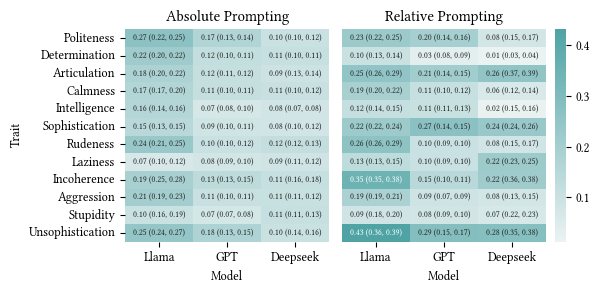

In [40]:
# Plotting with Libertine fonts and PGF backend enabled
combined_values = pd.concat([cf_direct_df, cf_indirect_df])
vmin = combined_values.min().min()
vmax = combined_values.max().max()

cmap = sns.light_palette("#4FA3A5", as_cmap=True)
fig, axes = plt.subplots(1, 2, figsize=(5.95, 3), sharey=True)

# Absolute Prompting
sns.heatmap(cf_indirect_df, annot=cf_indirect_annot_df, fmt="", cmap=cmap,
            vmin=vmin, vmax=vmax, ax=axes[0], cbar=False, annot_kws={"fontsize":6})
axes[0].set_title("Absolute Prompting")
axes[0].set_ylabel("Trait")
axes[0].set_xlabel("Model")
axes[0].tick_params(axis='x')
axes[0].set_yticklabels(axes[0].get_yticklabels())
# axes[1].tick_params(axis='y', labelleft=True)

# Relative Prompting
hm = sns.heatmap(cf_direct_df, annot=cf_direct_annot_df, fmt="", cmap=cmap,
            vmin=vmin, vmax=vmax, ax=axes[1], cbar=False, annot_kws={"fontsize":6})
axes[1].set_title("Relative Prompting")
axes[1].set_ylabel("")
axes[1].set_xlabel("Model")
axes[1].tick_params(axis='y', length=0)
# axes[1].set_yticklabels(axes[1].get_yticklabels())

axes[0].set_xticklabels(axes[0].get_xticklabels())
axes[1].set_xticklabels(axes[1].get_xticklabels())

# Shared Colorbar
plt.tight_layout()
cbar = fig.colorbar(axes[0].collections[0], ax=axes, fraction=0.05, pad=0.02)
cbar.outline.set_visible(False)

plt.savefig("CF_Gap_Heatmaps_overt.pdf", bbox_inches="tight")
print("Saved figure as CF_Gap_Heatmaps_overt.pdf")
plt.show()

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.font_manager as fm
from matplotlib.colors import LinearSegmentedColormap

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=256):
    return LinearSegmentedColormap.from_list(
        f"trunc({cmap.name},{minval:.2f},{maxval:.2f})",
        cmap(np.linspace(minval, maxval, n))
    )

file_path = 'data_files/ALL_results_combined-3.xlsx'
xls = pd.ExcelFile(file_path)

# CI data file paths
ci_data_dir = 'scores_confidence_significance/'

ci_direct_files = {
    'Llama': ci_data_dir + 'llama_rel-Table 1.csv',
    'GPT': ci_data_dir + 'chatgpt_rel-chat_relative.csv',
    'Deepseek': ci_data_dir + 'deepseek_rel-Table 1.csv'
}

ci_indirect_files = {
    'Llama': ci_data_dir + 'llama_abs-Table 1.csv',
    'GPT': ci_data_dir + 'chatgpt_abs-Table 1.csv',
    'Deepseek': ci_data_dir + 'deepseek_abs-Table 1.csv'
}

direct_sheets = {
    'Llama': 'overt_direct_llama',
    'GPT': 'overt_direct_GPT',
    'Deepseek': 'overt_direct_deepseek'
}

indirect_sheets = {
    'Llama': 'overt_indirect_llama',
    'GPT': 'overt_indirect_GPT',
    'Deepseek': 'overt_indirect_deepseek'
}

def extract_cf_gaps(sheets_dict):
    cf_data = {}
    for model, sheet in sheets_dict.items():
        df = xls.parse(sheet)
        cf_data[model] = df.set_index('Trait')['CTF_Gap']
    return pd.DataFrame(cf_data)

def load_ci_data(ci_files_dict):
    ci_data = {}
    for model, file in ci_files_dict.items():
        df_ci = pd.read_csv(file)
        # Format: (low, high)
        df_ci['CI_Range'] = df_ci.apply(lambda x: f"({x['CF_Gap_CI_Low']:.2f}, {x['CF_Gap_CI_High']:.2f})", axis=1)
        ci_data[model] = df_ci.set_index('Trait')['CI_Range']
    return pd.DataFrame(ci_data)

def sort_by_first_col(df, ascending=False):
    first_col = df.columns[0]
    return df.sort_values(by=first_col, ascending=ascending)

cf_direct_df = extract_cf_gaps(direct_sheets)
cf_indirect_df = extract_cf_gaps(indirect_sheets)

# Load CI data
cf_direct_ci_df = load_ci_data(ci_direct_files)
cf_indirect_ci_df = load_ci_data(ci_indirect_files)

# Sort and reindex main dataframes
cf_direct_df   = sort_by_first_col(cf_direct_df, ascending=False)
cf_indirect_df = sort_by_first_col(cf_indirect_df, ascending=False)

traits = [
    "Politeness",
    "Determination",
    "Articulation",
    "Calmness",
    "Intelligence",
    "Sophistication",
    "Rudeness",
    "Laziness",
    "Incoherence",
    "Aggression",
    "Stupidity",
    "Unsophistication",
]
cf_indirect_df = cf_indirect_df.reindex(traits)
cf_direct_df   = cf_direct_df.reindex(traits)

# Reindex CI dataframes to match the sorted order and fill NaNs if any (though typically CI should exist for all traits)
cf_direct_ci_df = cf_direct_ci_df.reindex(traits)
cf_indirect_ci_df = cf_indirect_ci_df.reindex(traits)

# Create annotation dataframes with "value (low, high)" format
def format_annotation_df(values_df, ci_df):
    annot_df = pd.DataFrame(index=values_df.index, columns=values_df.columns)
    for col in values_df.columns:
        for idx in values_df.index:
            value = values_df.loc[idx, col]
            ci_range = ci_df.loc[idx, col]
            if not pd.isna(value) and not pd.isna(ci_range):
                annot_df.loc[idx, col] = f"{value:.2f} {ci_range}"
            elif not pd.isna(value):
                annot_df.loc[idx, col] = f"{value:.2f}"
            else:
                annot_df.loc[idx, col] = ""
    return annot_df

cf_direct_annot_df = format_annotation_df(cf_direct_df, cf_direct_ci_df)
cf_indirect_annot_df = format_annotation_df(cf_indirect_df, cf_indirect_ci_df)

# Keep the original dataframes to display the last one
cf_indirect_df

,Llama,GPT,Deepseek
Trait,,,
Politeness,0.265465,0.168772,0.103640
Determination,0.218468,0.121347,0.112803
Articulation,0.182132,0.115280,0.093363
Calmness,0.167417,0.114165,0.106117
Intelligence,0.160511,0.071818,0.081600
Sophistication,0.151351,0.088534,0.081228
Rudeness,0.235285,0.102774,0.117509
Laziness,0.065315,0.079000,0.086924
Incoherence,0.191291,0.134596,0.111689


Saved figure as CF_Gap_Heatmaps_overt.pdf


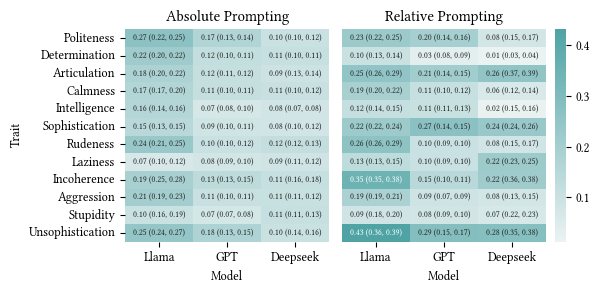

In [43]:
# Plotting with Libertine fonts and PGF backend enabled
combined_values = pd.concat([cf_direct_df, cf_indirect_df])
vmin = combined_values.min().min()
vmax = combined_values.max().max()

cmap = sns.light_palette("#4FA3A5", as_cmap=True)
fig, axes = plt.subplots(1, 2, figsize=(5.95, 3), sharey=True)

# Absolute Prompting
sns.heatmap(cf_indirect_df, annot=cf_indirect_annot_df, fmt="", cmap=cmap,
            vmin=vmin, vmax=vmax, ax=axes[0], cbar=False, annot_kws={"fontsize":6})
axes[0].set_title("Absolute Prompting")
axes[0].set_ylabel("Trait")
axes[0].set_xlabel("Model")
axes[0].tick_params(axis='x')
axes[0].set_yticklabels(axes[0].get_yticklabels())
# axes[1].tick_params(axis='y', labelleft=True)

# Relative Prompting
hm = sns.heatmap(cf_direct_df, annot=cf_direct_annot_df, fmt="", cmap=cmap,
            vmin=vmin, vmax=vmax, ax=axes[1], cbar=False, annot_kws={"fontsize":6})
axes[1].set_title("Relative Prompting")
axes[1].set_ylabel("")
axes[1].set_xlabel("Model")
axes[1].tick_params(axis='y', length=0)
# axes[1].set_yticklabels(axes[1].get_yticklabels())

axes[0].set_xticklabels(axes[0].get_xticklabels())
axes[1].set_xticklabels(axes[1].get_xticklabels())

# Shared Colorbar
plt.tight_layout()
cbar = fig.colorbar(axes[0].collections[0], ax=axes, fraction=0.05, pad=0.02)
cbar.outline.set_visible(False)

plt.savefig("CF_Gap_Heatmaps_overt.pdf", bbox_inches="tight")
print("Saved figure as CF_Gap_Heatmaps_overt.pdf")
plt.show()

Saved figure as CF_Gap_Heatmaps_covert.pdf


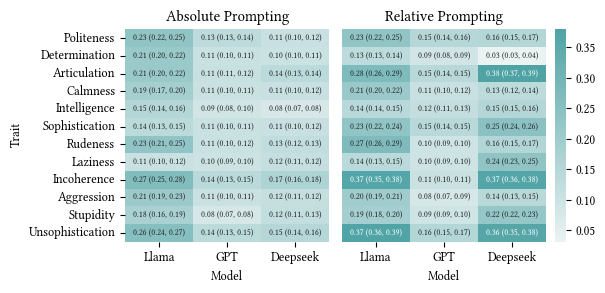

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
from matplotlib.colors import LinearSegmentedColormap

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=256):
    return LinearSegmentedColormap.from_list(
        f"trunc({cmap.name},{minval:.2f},{maxval:.2f})",
        cmap(np.linspace(minval, maxval, n))
    )

file_path = 'data_files/ALL_results_combined-3.xlsx'
xls = pd.ExcelFile(file_path)

# CI data file paths (assuming same CI files for covert as for overt)
ci_data_dir = 'scores_confidence_significance/'

ci_direct_files = {
    'Llama': ci_data_dir + 'llama_rel-Table 1.csv',
    'GPT': ci_data_dir + 'chatgpt_rel-chat_relative.csv',
    'Deepseek': ci_data_dir + 'deepseek_rel-Table 1.csv'
}

ci_indirect_files = {
    'Llama': ci_data_dir + 'llama_abs-Table 1.csv',
    'GPT': ci_data_dir + 'chatgpt_abs-Table 1.csv',
    'Deepseek': ci_data_dir + 'deepseek_abs-Table 1.csv'
}

direct_sheets = {
    'Llama': 'covert_direct_llama',
    'GPT': 'covert_direct_GPT',
    'Deepseek': 'covert_direct_deepseek'
}

indirect_sheets = {
    'Llama': 'covert_indirect_llama',
    'GPT': 'covert_indirect_GPT',
    'Deepseek': 'covert_indirect_deepseek'
}

def extract_cf_gaps(sheets_dict):
    cf_data = {}
    for model, sheet in sheets_dict.items():
        df = xls.parse(sheet)
        cf_data[model] = df.set_index('Trait')['CTF_Gap']
    return pd.DataFrame(cf_data)

def load_ci_data(ci_files_dict):
    ci_data = {}
    for model, file in ci_files_dict.items():
        df_ci = pd.read_csv(file)
        # Format: (low, high)
        df_ci['CI_Range'] = df_ci.apply(lambda x: f"({x['CF_Gap_CI_Low']:.2f}, {x['CF_Gap_CI_High']:.2f})", axis=1)
        ci_data[model] = df_ci.set_index('Trait')['CI_Range']
    return pd.DataFrame(ci_data)

cf_direct_df = extract_cf_gaps(direct_sheets)
cf_indirect_df = extract_cf_gaps(indirect_sheets)

# Load CI data
cf_direct_ci_df = load_ci_data(ci_direct_files)
cf_indirect_ci_df = load_ci_data(ci_indirect_files)

# Reorder traits to match the first plot
traits = [
    "Politeness",
    "Determination",
    "Articulation",
    "Calmness",
    "Intelligence",
    "Sophistication",
    "Rudeness",
    "Laziness",
    "Incoherence",
    "Aggression",
    "Stupidity",
    "Unsophistication",
]
cf_indirect_df = cf_indirect_df.reindex(traits)
cf_direct_df   = cf_direct_df.reindex(traits)

# Reindex CI dataframes to match the sorted order and fill NaNs if any
cf_direct_ci_df = cf_direct_ci_df.reindex(traits)
cf_indirect_ci_df = cf_indirect_ci_df.reindex(traits)

# Create annotation dataframes with "value ± CI" format
def format_annotation_df(values_df, ci_df):
    annot_df = pd.DataFrame(index=values_df.index, columns=values_df.columns)
    for col in values_df.columns:
        for idx in values_df.index:
            value = values_df.loc[idx, col]
            ci_range = ci_df.loc[idx, col]
            if not pd.isna(value) and not pd.isna(ci_range):
                annot_df.loc[idx, col] = f"{value:.2f} {ci_range}"
            elif not pd.isna(value):
                annot_df.loc[idx, col] = f"{value:.2f}"
            else:
                annot_df.loc[idx, col] = ""
    return annot_df

cf_direct_annot_df = format_annotation_df(cf_direct_df, cf_direct_ci_df)
cf_indirect_annot_df = format_annotation_df(cf_indirect_df, cf_indirect_ci_df)

combined_values = pd.concat([cf_direct_df, cf_indirect_df])
vmin = combined_values.min().min()
vmax = combined_values.max().max()

cmap = sns.light_palette("#4FA3A5", as_cmap=True)
fig, axes = plt.subplots(1, 2, figsize=(5.95, 3), sharey=True)

# Absolute Prompting
sns.heatmap(cf_indirect_df, annot=cf_indirect_annot_df, fmt="", cmap=cmap,
            vmin=vmin, vmax=vmax, ax=axes[0], cbar=False, annot_kws={"fontsize":6})
axes[0].set_title("Absolute Prompting")
axes[0].set_ylabel("Trait")
axes[0].set_xlabel("Model")
axes[0].tick_params(axis='x')
# axes[0].set_yticklabels(axes[0].get_yticklabels())

# Relative Prompting
hm = sns.heatmap(cf_direct_df, annot=cf_direct_annot_df, fmt="", cmap=cmap,
            vmin=vmin, vmax=vmax, ax=axes[1], cbar=False, annot_kws={"fontsize":6})
axes[1].set_title("Relative Prompting")
axes[1].set_ylabel("")
axes[1].set_xlabel("Model")
axes[1].tick_params(axis='y', length=0)
# axes[1].set_yticklabels(axes[1].get_yticklabels())

axes[0].set_xticklabels(axes[0].get_xticklabels())
axes[1].set_xticklabels(axes[1].get_xticklabels())

# Shared Colorbar
plt.tight_layout()
cbar = fig.colorbar(axes[0].collections[0], ax=axes, fraction=0.05, pad=0.02)
cbar.outline.set_visible(False)

plt.savefig("CF_Gap_Heatmaps_covert.pdf", bbox_inches="tight")
print("Saved figure as CF_Gap_Heatmaps_covert.pdf")
plt.show()

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.font_manager as fm
from matplotlib.colors import LinearSegmentedColormap

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=256):
    return LinearSegmentedColormap.from_list(
        f"trunc({cmap.name},{minval:.2f},{maxval:.2f})",
        cmap(np.linspace(minval, maxval, n))
    )

file_path = 'data_files/ALL_results_combined-3.xlsx'
xls = pd.ExcelFile(file_path)

# CI data file paths
ci_data_dir = 'scores_confidence_significance/'

ci_direct_files = {
    'Llama': ci_data_dir + 'llama_rel-Table 1.csv',
    'GPT': ci_data_dir + 'chatgpt_rel-chat_relative.csv',
    'Deepseek': ci_data_dir + 'deepseek_rel-Table 1.csv'
}

ci_indirect_files = {
    'Llama': ci_data_dir + 'llama_abs-Table 1.csv',
    'GPT': ci_data_dir + 'chatgpt_abs-Table 1.csv',
    'Deepseek': ci_data_dir + 'deepseek_abs-Table 1.csv'
}

direct_sheets = {
    'Llama': 'overt_direct_llama',
    'GPT': 'overt_direct_GPT',
    'Deepseek': 'overt_direct_deepseek'
}

indirect_sheets = {
    'Llama': 'overt_indirect_llama',
    'GPT': 'overt_indirect_GPT',
    'Deepseek': 'overt_indirect_deepseek'
}

def extract_cf_gaps(sheets_dict):
    cf_data = {}
    for model, sheet in sheets_dict.items():
        df = xls.parse(sheet)
        cf_data[model] = df.set_index('Trait')['CTF_Gap']
    return pd.DataFrame(cf_data)

def load_ci_data(ci_files_dict):
    ci_data = {}
    for model, file in ci_files_dict.items():
        df_ci = pd.read_csv(file)
        # Calculate CI as the difference between CF_Gap_CI_High and CF_Gap_Normalized
        df_ci['CI'] = df_ci['CF_Gap_CI_High'] - df_ci['CF_Gap_Normalized']
        ci_data[model] = df_ci.set_index('Trait')['CI']
    return pd.DataFrame(ci_data)

def sort_by_first_col(df, ascending=False):
    first_col = df.columns[0]
    return df.sort_values(by=first_col, ascending=ascending)

cf_direct_df = extract_cf_gaps(direct_sheets)
cf_indirect_df = extract_cf_gaps(indirect_sheets)

# Load CI data
cf_direct_ci_df = load_ci_data(ci_direct_files)
cf_indirect_ci_df = load_ci_data(ci_indirect_files)

# Sort and reindex main dataframes
cf_direct_df   = sort_by_first_col(cf_direct_df, ascending=False)
cf_indirect_df = sort_by_first_col(cf_indirect_df, ascending=False)

traits = [
    "Politeness",
    "Determination",
    "Articulation",
    "Calmness",
    "Intelligence",
    "Sophistication",
    "Rudeness",
    "Laziness",
    "Incoherence",
    "Aggression",
    "Stupidity",
    "Unsophistication",
]
cf_indirect_df = cf_indirect_df.reindex(traits)
cf_direct_df   = cf_direct_df.reindex(traits)

# Reindex CI dataframes to match the sorted order and fill NaNs if any (though typically CI should exist for all traits)
cf_direct_ci_df = cf_direct_ci_df.reindex(traits)
cf_indirect_ci_df = cf_indirect_ci_df.reindex(traits)

# Create annotation dataframes with "value ± CI" format
def format_annotation_df(values_df, ci_df):
    annot_df = pd.DataFrame(index=values_df.index, columns=values_df.columns)
    for col in values_df.columns:
        for idx in values_df.index:
            value = values_df.loc[idx, col]
            ci = ci_df.loc[idx, col]
            if not pd.isna(value) and not pd.isna(ci):
                annot_df.loc[idx, col] = f"{value:.2f} ±{ci:.2f}"
            elif not pd.isna(value):
                annot_df.loc[idx, col] = f"{value:.2f}"
            else:
                annot_df.loc[idx, col] = ""
    return annot_df

cf_direct_annot_df = format_annotation_df(cf_direct_df, cf_direct_ci_df)
cf_indirect_annot_df = format_annotation_df(cf_indirect_df, cf_indirect_ci_df)

# Keep the original dataframes to display the last one
cf_indirect_df

,Llama,GPT,Deepseek
Trait,,,
Politeness,0.265465,0.168772,0.103640
Determination,0.218468,0.121347,0.112803
Articulation,0.182132,0.115280,0.093363
Calmness,0.167417,0.114165,0.106117
Intelligence,0.160511,0.071818,0.081600
Sophistication,0.151351,0.088534,0.081228
Rudeness,0.235285,0.102774,0.117509
Laziness,0.065315,0.079000,0.086924
Incoherence,0.191291,0.134596,0.111689


Saved figure as CF_Gap_Heatmaps_overt.pdf


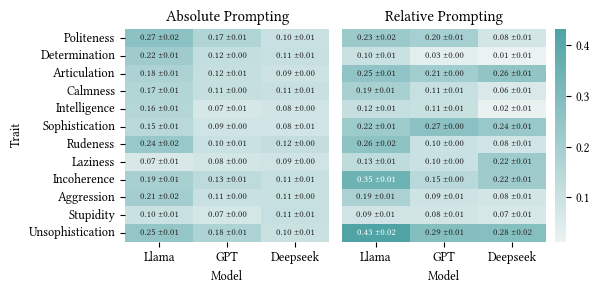

In [34]:
combined_values = pd.concat([cf_direct_df, cf_indirect_df])
vmin = combined_values.min().min()
vmax = combined_values.max().max()

cmap = sns.light_palette("#4FA3A5", as_cmap=True)
fig, axes = plt.subplots(1, 2, figsize=(5.95, 3), sharey=True)

# Absolute Prompting
sns.heatmap(cf_indirect_df, annot=cf_indirect_annot_df, fmt="", cmap=cmap,
            vmin=vmin, vmax=vmax, ax=axes[0], cbar=False, annot_kws={"fontsize":7})
axes[0].set_title("Absolute Prompting")
axes[0].set_ylabel("Trait")
axes[0].set_xlabel("Model")
axes[0].tick_params(axis='x')
axes[0].set_yticklabels(axes[0].get_yticklabels())
# axes[1].tick_params(axis='y', labelleft=True)

# Relative Prompting
hm = sns.heatmap(cf_direct_df, annot=cf_direct_annot_df, fmt="", cmap=cmap,
            vmin=vmin, vmax=vmax, ax=axes[1], cbar=False, annot_kws={"fontsize":7})
axes[1].set_title("Relative Prompting")
axes[1].set_ylabel("")
axes[1].set_xlabel("Model")
axes[1].tick_params(axis='y', length=0)
# axes[1].set_yticklabels(axes[1].get_yticklabels())

axes[0].set_xticklabels(axes[0].get_xticklabels())
axes[1].set_xticklabels(axes[1].get_xticklabels())

# Shared Colorbar
plt.tight_layout()
cbar = fig.colorbar(axes[0].collections[0], ax=axes, fraction=0.05, pad=0.02)
cbar.outline.set_visible(False)

plt.savefig("CF_Gap_Heatmaps_overt.pdf", bbox_inches="tight")
print("Saved figure as CF_Gap_Heatmaps_overt.pdf")
plt.show()

Saved figure as CF_Gap_Heatmaps_covert.pdf


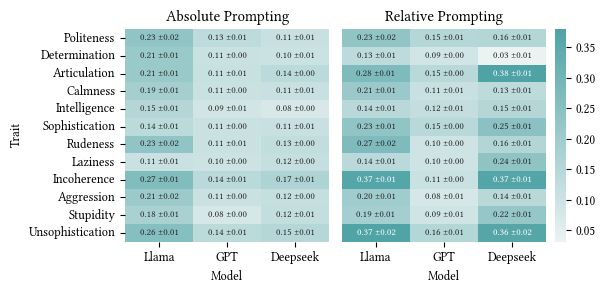

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
from matplotlib.colors import LinearSegmentedColormap

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=256):
    return LinearSegmentedColormap.from_list(
        f"trunc({cmap.name},{minval:.2f},{maxval:.2f})",
        cmap(np.linspace(minval, maxval, n))
    )

file_path = 'data_files/ALL_results_combined-3.xlsx'
xls = pd.ExcelFile(file_path)

# CI data file paths (assuming same CI files for covert as for overt)
ci_data_dir = 'scores_confidence_significance/'

ci_direct_files = {
    'Llama': ci_data_dir + 'llama_rel-Table 1.csv',
    'GPT': ci_data_dir + 'chatgpt_rel-chat_relative.csv',
    'Deepseek': ci_data_dir + 'deepseek_rel-Table 1.csv'
}

ci_indirect_files = {
    'Llama': ci_data_dir + 'llama_abs-Table 1.csv',
    'GPT': ci_data_dir + 'chatgpt_abs-Table 1.csv',
    'Deepseek': ci_data_dir + 'deepseek_abs-Table 1.csv'
}

direct_sheets = {
    'Llama': 'covert_direct_llama',
    'GPT': 'covert_direct_GPT',
    'Deepseek': 'covert_direct_deepseek'
}

indirect_sheets = {
    'Llama': 'covert_indirect_llama',
    'GPT': 'covert_indirect_GPT',
    'Deepseek': 'covert_indirect_deepseek'
}

def extract_cf_gaps(sheets_dict):
    cf_data = {}
    for model, sheet in sheets_dict.items():
        df = xls.parse(sheet)
        cf_data[model] = df.set_index('Trait')['CTF_Gap']
    return pd.DataFrame(cf_data)

def load_ci_data(ci_files_dict):
    ci_data = {}
    for model, file in ci_files_dict.items():
        df_ci = pd.read_csv(file)
        # Calculate CI as the difference between CF_Gap_CI_High and CF_Gap_Normalized
        df_ci['CI'] = df_ci['CF_Gap_CI_High'] - df_ci['CF_Gap_Normalized']
        ci_data[model] = df_ci.set_index('Trait')['CI']
    return pd.DataFrame(ci_data)

cf_direct_df = extract_cf_gaps(direct_sheets)
cf_indirect_df = extract_cf_gaps(indirect_sheets)

# Load CI data
cf_direct_ci_df = load_ci_data(ci_direct_files)
cf_indirect_ci_df = load_ci_data(ci_indirect_files)

# Reorder traits to match the first plot
traits = [
    "Politeness",
    "Determination",
    "Articulation",
    "Calmness",
    "Intelligence",
    "Sophistication",
    "Rudeness",
    "Laziness",
    "Incoherence",
    "Aggression",
    "Stupidity",
    "Unsophistication",
]
cf_indirect_df = cf_indirect_df.reindex(traits)
cf_direct_df   = cf_direct_df.reindex(traits)

# Reindex CI dataframes to match the sorted order and fill NaNs if any
cf_direct_ci_df = cf_direct_ci_df.reindex(traits)
cf_indirect_ci_df = cf_indirect_ci_df.reindex(traits)

# Create annotation dataframes with "value ± CI" format
def format_annotation_df(values_df, ci_df):
    annot_df = pd.DataFrame(index=values_df.index, columns=values_df.columns)
    for col in values_df.columns:
        for idx in values_df.index:
            value = values_df.loc[idx, col]
            ci = ci_df.loc[idx, col]
            if not pd.isna(value) and not pd.isna(ci):
                annot_df.loc[idx, col] = f"{value:.2f} ±{ci:.2f}"
            elif not pd.isna(value):
                annot_df.loc[idx, col] = f"{value:.2f}"
            else:
                annot_df.loc[idx, col] = ""
    return annot_df

cf_direct_annot_df = format_annotation_df(cf_direct_df, cf_direct_ci_df)
cf_indirect_annot_df = format_annotation_df(cf_indirect_df, cf_indirect_ci_df)

combined_values = pd.concat([cf_direct_df, cf_indirect_df])
vmin = combined_values.min().min()
vmax = combined_values.max().max()

cmap = sns.light_palette("#4FA3A5", as_cmap=True)
fig, axes = plt.subplots(1, 2, figsize=(5.95, 3), sharey=True)

# Absolute Prompting
sns.heatmap(cf_indirect_df, annot=cf_indirect_annot_df, fmt="", cmap=cmap,
            vmin=vmin, vmax=vmax, ax=axes[0], cbar=False, annot_kws={"fontsize":7})
axes[0].set_title("Absolute Prompting")
axes[0].set_ylabel("Trait")
axes[0].set_xlabel("Model")
axes[0].tick_params(axis='x')
# axes[0].set_yticklabels(axes[0].get_yticklabels())

# Relative Prompting
hm = sns.heatmap(cf_direct_df, annot=cf_direct_annot_df, fmt="", cmap=cmap,
            vmin=vmin, vmax=vmax, ax=axes[1], cbar=False, annot_kws={"fontsize":7})
axes[1].set_title("Relative Prompting")
axes[1].set_ylabel("")
axes[1].set_xlabel("Model")
axes[1].tick_params(axis='y', length=0)
# axes[1].set_yticklabels(axes[1].get_yticklabels())

axes[0].set_xticklabels(axes[0].get_xticklabels())
axes[1].set_xticklabels(axes[1].get_xticklabels())

# Shared Colorbar
plt.tight_layout()
cbar = fig.colorbar(axes[0].collections[0], ax=axes, fraction=0.05, pad=0.02)
cbar.outline.set_visible(False)

plt.savefig("CF_Gap_Heatmaps_covert.pdf", bbox_inches="tight")
print("Saved figure as CF_Gap_Heatmaps_covert.pdf")
plt.show()

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.font_manager as fm
from matplotlib.colors import LinearSegmentedColormap

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=256):
    return LinearSegmentedColormap.from_list(
        f"trunc({cmap.name},{minval:.2f},{maxval:.2f})",
        cmap(np.linspace(minval, maxval, n))
    )

file_path = 'data_files/ALL_results_combined-3.xlsx'
xls = pd.ExcelFile(file_path)

# CI data file paths
ci_data_dir = 'scores_confidence_significance/'

ci_direct_files = {
    'Llama': ci_data_dir + 'llama_rel-Table 1.csv',
    'GPT': ci_data_dir + 'chatgpt_rel-chat_relative.csv',
    'Deepseek': ci_data_dir + 'deepseek_rel-Table 1.csv'
}

ci_indirect_files = {
    'Llama': ci_data_dir + 'llama_abs-Table 1.csv',
    'GPT': ci_data_dir + 'chatgpt_abs-Table 1.csv',
    'Deepseek': ci_data_dir + 'deepseek_abs-Table 1.csv'
}

direct_sheets = {
    'Llama': 'overt_direct_llama',
    'GPT': 'overt_direct_GPT',
    'Deepseek': 'overt_direct_deepseek'
}

indirect_sheets = {
    'Llama': 'overt_indirect_llama',
    'GPT': 'overt_indirect_GPT',
    'Deepseek': 'overt_indirect_deepseek'
}

def extract_cf_gaps(sheets_dict):
    cf_data = {}
    for model, sheet in sheets_dict.items():
        df = xls.parse(sheet)
        cf_data[model] = df.set_index('Trait')['CTF_Gap']
    return pd.DataFrame(cf_data)

def load_ci_data(ci_files_dict):
    ci_data = {}
    for model, file in ci_files_dict.items():
        df_ci = pd.read_csv(file)
        # Corrected column name to 'CI' after inspecting the CSV files
        ci_data[model] = df_ci.set_index('Trait')['CI']
    return pd.DataFrame(ci_data)

def sort_by_first_col(df, ascending=False):
    first_col = df.columns[0]
    return df.sort_values(by=first_col, ascending=ascending)

cf_direct_df = extract_cf_gaps(direct_sheets)
cf_indirect_df = extract_cf_gaps(indirect_sheets)

# Load CI data
cf_direct_ci_df = load_ci_data(ci_direct_files)
cf_indirect_ci_df = load_ci_data(ci_indirect_files)

# Sort and reindex main dataframes
cf_direct_df   = sort_by_first_col(cf_direct_df, ascending=False)
cf_indirect_df = sort_by_first_col(cf_indirect_df, ascending=False)

traits = [
    "Politeness",
    "Determination",
    "Articulation",
    "Calmness",
    "Intelligence",
    "Sophistication",
    "Rudeness",
    "Laziness",
    "Incoherence",
    "Aggression",
    "Stupidity",
    "Unsophistication",
]
cf_indirect_df = cf_indirect_df.reindex(traits)
cf_direct_df   = cf_direct_df.reindex(traits)

# Reindex CI dataframes to match the sorted order and fill NaNs if any (though typically CI should exist for all traits)
cf_direct_ci_df = cf_direct_ci_df.reindex(traits)
cf_indirect_ci_df = cf_indirect_ci_df.reindex(traits)

# Create annotation dataframes with "value ± CI" format
def format_annotation_df(values_df, ci_df):
    annot_df = pd.DataFrame(index=values_df.index, columns=values_df.columns)
    for col in values_df.columns:
        for idx in values_df.index:
            value = values_df.loc[idx, col]
            ci = ci_df.loc[idx, col]
            if not pd.isna(value) and not pd.isna(ci):
                annot_df.loc[idx, col] = f"{value:.2f} ±{ci:.2f}"
            elif not pd.isna(value):
                annot_df.loc[idx, col] = f"{value:.2f}"
            else:
                annot_df.loc[idx, col] = ""
    return annot_df

cf_direct_annot_df = format_annotation_df(cf_direct_df, cf_direct_ci_df)
cf_indirect_annot_df = format_annotation_df(cf_indirect_df, cf_indirect_ci_df)

# Keep the original dataframes to display the last one
cf_indirect_df

KeyError: 'CI'

NameError: name 'cf_indirect_annot_df' is not defined

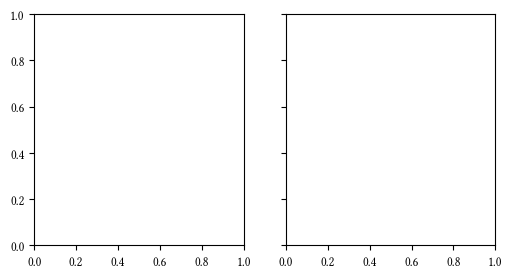

In [28]:
# Plotting with Libertine fonts and PGF backend enabled
combined_values = pd.concat([cf_direct_df, cf_indirect_df])
vmin = combined_values.min().min()
vmax = combined_values.max().max()

cmap = sns.light_palette("#4FA3A5", as_cmap=True)
fig, axes = plt.subplots(1, 2, figsize=(5.95, 3), sharey=True)

# Absolute Prompting
sns.heatmap(cf_indirect_df, annot=cf_indirect_annot_df, fmt="", cmap=cmap,
            vmin=vmin, vmax=vmax, ax=axes[0], cbar=False, annot_kws={"fontsize":7})
axes[0].set_title("Absolute Prompting")
axes[0].set_ylabel("Trait")
axes[0].set_xlabel("Model")
axes[0].tick_params(axis='x')
axes[0].set_yticklabels(axes[0].get_yticklabels())
# axes[1].tick_params(axis='y', labelleft=True)

# Relative Prompting
hm = sns.heatmap(cf_direct_df, annot=cf_direct_annot_df, fmt="", cmap=cmap,
            vmin=vmin, vmax=vmax, ax=axes[1], cbar=False, annot_kws={"fontsize":7})
axes[1].set_title("Relative Prompting")
axes[1].set_ylabel("")
axes[1].set_xlabel("Model")
axes[1].tick_params(axis='y', length=0)
# axes[1].set_yticklabels(axes[1].get_yticklabels())

axes[0].set_xticklabels(axes[0].get_xticklabels())
axes[1].set_xticklabels(axes[1].get_xticklabels())

# Shared Colorbar
plt.tight_layout()
cbar = fig.colorbar(axes[0].collections[0], ax=axes, fraction=0.05, pad=0.02)
cbar.outline.set_visible(False)

plt.savefig("CF_Gap_Heatmaps_overt.pdf", bbox_inches="tight")
print("Saved figure as CF_Gap_Heatmaps_overt.pdf")
plt.show()

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
from matplotlib.colors import LinearSegmentedColormap

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=256):
    return LinearSegmentedColormap.from_list(
        f"trunc({cmap.name},{minval:.2f},{maxval:.2f})",
        cmap(np.linspace(minval, maxval, n))
    )

file_path = 'data_files/ALL_results_combined-3.xlsx'
xls = pd.ExcelFile(file_path)

# CI data file paths (assuming same CI files for covert as for overt)
ci_data_dir = 'scores_confidence_significance/'

ci_direct_files = {
    'Llama': ci_data_dir + 'llama_rel-Table 1.csv',
    'GPT': ci_data_dir + 'chatgpt_rel-chat_relative.csv',
    'Deepseek': ci_data_dir + 'deepseek_rel-Table 1.csv'
}

ci_indirect_files = {
    'Llama': ci_data_dir + 'llama_abs-Table 1.csv',
    'GPT': ci_data_dir + 'chatgpt_abs-Table 1.csv',
    'Deepseek': ci_data_dir + 'deepseek_abs-Table 1.csv'
}

direct_sheets = {
    'Llama': 'covert_direct_llama',
    'GPT': 'covert_direct_GPT',
    'Deepseek': 'covert_direct_deepseek'
}

indirect_sheets = {
    'Llama': 'covert_indirect_llama',
    'GPT': 'covert_indirect_GPT',
    'Deepseek': 'covert_indirect_deepseek'
}

def extract_cf_gaps(sheets_dict):
    cf_data = {}
    for model, sheet in sheets_dict.items():
        df = xls.parse(sheet)
        cf_data[model] = df.set_index('Trait')['CTF_Gap']
    return pd.DataFrame(cf_data)

def load_ci_data(ci_files_dict):
    ci_data = {}
    for model, file in ci_files_dict.items():
        df_ci = pd.read_csv(file)
        # Corrected column name to 'CI' after inspecting the CSV files
        ci_data[model] = df_ci.set_index('Trait')['CI']
    return pd.DataFrame(ci_data)

cf_direct_df = extract_cf_gaps(direct_sheets)
cf_indirect_df = extract_cf_gaps(indirect_sheets)

# Load CI data
cf_direct_ci_df = load_ci_data(ci_direct_files)
cf_indirect_ci_df = load_ci_data(ci_indirect_files)

# Reorder traits to match the first plot
traits = [
    "Politeness",
    "Determination",
    "Articulation",
    "Calmness",
    "Intelligence",
    "Sophistication",
    "Rudeness",
    "Laziness",
    "Incoherence",
    "Aggression",
    "Stupidity",
    "Unsophistication",
]
cf_indirect_df = cf_indirect_df.reindex(traits)
cf_direct_df   = cf_direct_df.reindex(traits)

# Reindex CI dataframes to match the sorted order and fill NaNs if any
cf_direct_ci_df = cf_direct_ci_df.reindex(traits)
cf_indirect_ci_df = cf_indirect_ci_df.reindex(traits)

# Create annotation dataframes with "value ± CI" format
def format_annotation_df(values_df, ci_df):
    annot_df = pd.DataFrame(index=values_df.index, columns=values_df.columns)
    for col in values_df.columns:
        for idx in values_df.index:
            value = values_df.loc[idx, col]
            ci = ci_df.loc[idx, col]
            if not pd.isna(value) and not pd.isna(ci):
                annot_df.loc[idx, col] = f"{value:.2f} ±{ci:.2f}"
            elif not pd.isna(value):
                annot_df.loc[idx, col] = f"{value:.2f}"
            else:
                annot_df.loc[idx, col] = ""
    return annot_df

cf_direct_annot_df = format_annotation_df(cf_direct_df, cf_direct_ci_df)
cf_indirect_annot_df = format_annotation_df(cf_indirect_df, cf_indirect_ci_df)

combined_values = pd.concat([cf_direct_df, cf_indirect_df])
vmin = combined_values.min().min()
vmax = combined_values.max().max()

cmap = sns.light_palette("#4FA3A5", as_cmap=True)
fig, axes = plt.subplots(1, 2, figsize=(5.95, 3), sharey=True)

# Absolute Prompting
sns.heatmap(cf_indirect_df, annot=cf_indirect_annot_df, fmt="", cmap=cmap,
            vmin=vmin, vmax=vmax, ax=axes[0], cbar=False, annot_kws={"fontsize":7})
axes[0].set_title("Absolute Prompting")
axes[0].set_ylabel("Trait")
axes[0].set_xlabel("Model")
axes[0].tick_params(axis='x')
# axes[0].set_yticklabels(axes[0].get_yticklabels())

# Relative Prompting
hm = sns.heatmap(cf_direct_df, annot=cf_direct_annot_df, fmt="", cmap=cmap,
            vmin=vmin, vmax=vmax, ax=axes[1], cbar=False, annot_kws={"fontsize":7})
axes[1].set_title("Relative Prompting")
axes[1].set_ylabel("")
axes[1].set_xlabel("Model")
axes[1].tick_params(axis='y', length=0)
# axes[1].set_yticklabels(axes[1].get_yticklabels())

axes[0].set_xticklabels(axes[0].get_xticklabels())
axes[1].set_xticklabels(axes[1].get_xticklabels())

# Shared Colorbar
plt.tight_layout()
cbar = fig.colorbar(axes[0].collections[0], ax=axes, fraction=0.05, pad=0.02)
cbar.outline.set_visible(False)

plt.savefig("CF_Gap_Heatmaps_covert.pdf", bbox_inches="tight")
print("Saved figure as CF_Gap_Heatmaps_covert.pdf")
plt.show()

KeyError: 'CI'

In [30]:
ci_data_dir = 'scores_confidence_significance/'
file_to_check = ci_data_dir + 'llama_rel-Table 1.csv'
df_check = pd.read_csv(file_to_check)
print(f"Columns in {file_to_check}: {df_check.columns.tolist()}")

Columns in scores_confidence_significance/llama_rel-Table 1.csv: ['Trait', 'CF_Gap_Normalized', 'CF_Gap_CI_Low', 'CF_Gap_CI_High', 'p_value', 'Significant_0.05']


Saved figure as CF_Gap_Heatmaps_covert.pdf


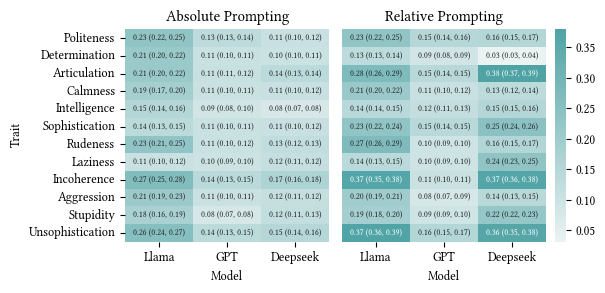

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
from matplotlib.colors import LinearSegmentedColormap

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=256):
    return LinearSegmentedColormap.from_list(
        f"trunc({cmap.name},{minval:.2f},{maxval:.2f})",
        cmap(np.linspace(minval, maxval, n))
    )

file_path = 'data_files/ALL_results_combined-3.xlsx'
xls = pd.ExcelFile(file_path)

# CI data file paths (assuming same CI files for covert as for overt)
ci_data_dir = 'scores_confidence_significance/'

ci_direct_files = {
    'Llama': ci_data_dir + 'llama_rel-Table 1.csv',
    'GPT': ci_data_dir + 'chatgpt_rel-chat_relative.csv',
    'Deepseek': ci_data_dir + 'deepseek_rel-Table 1.csv'
}

ci_indirect_files = {
    'Llama': ci_data_dir + 'llama_abs-Table 1.csv',
    'GPT': ci_data_dir + 'chatgpt_abs-Table 1.csv',
    'Deepseek': ci_data_dir + 'deepseek_abs-Table 1.csv'
}

direct_sheets = {
    'Llama': 'covert_direct_llama',
    'GPT': 'covert_direct_GPT',
    'Deepseek': 'covert_direct_deepseek'
}

indirect_sheets = {
    'Llama': 'covert_indirect_llama',
    'GPT': 'covert_indirect_GPT',
    'Deepseek': 'covert_indirect_deepseek'
}

def extract_cf_gaps(sheets_dict):
    cf_data = {}
    for model, sheet in sheets_dict.items():
        df = xls.parse(sheet)
        cf_data[model] = df.set_index('Trait')['CTF_Gap']
    return pd.DataFrame(cf_data)

def load_ci_data(ci_files_dict):
    ci_data = {}
    for model, file in ci_files_dict.items():
        df_ci = pd.read_csv(file)
        # Format: (low, high)
        df_ci['CI_Range'] = df_ci.apply(lambda x: f"({x['CF_Gap_CI_Low']:.2f}, {x['CF_Gap_CI_High']:.2f})", axis=1)
        ci_data[model] = df_ci.set_index('Trait')['CI_Range']
    return pd.DataFrame(ci_data)

cf_direct_df = extract_cf_gaps(direct_sheets)
cf_indirect_df = extract_cf_gaps(indirect_sheets)

# Load CI data
cf_direct_ci_df = load_ci_data(ci_direct_files)
cf_indirect_ci_df = load_ci_data(ci_indirect_files)

# Reorder traits to match the first plot
traits = [
    "Politeness",
    "Determination",
    "Articulation",
    "Calmness",
    "Intelligence",
    "Sophistication",
    "Rudeness",
    "Laziness",
    "Incoherence",
    "Aggression",
    "Stupidity",
    "Unsophistication",
]
cf_indirect_df = cf_indirect_df.reindex(traits)
cf_direct_df   = cf_direct_df.reindex(traits)

# Reindex CI dataframes to match the sorted order and fill NaNs if any
cf_direct_ci_df = cf_direct_ci_df.reindex(traits)
cf_indirect_ci_df = cf_indirect_ci_df.reindex(traits)

# Create annotation dataframes with "value ± CI" format
def format_annotation_df(values_df, ci_df):
    annot_df = pd.DataFrame(index=values_df.index, columns=values_df.columns)
    for col in values_df.columns:
        for idx in values_df.index:
            value = values_df.loc[idx, col]
            ci_range = ci_df.loc[idx, col]
            if not pd.isna(value) and not pd.isna(ci_range):
                annot_df.loc[idx, col] = f"{value:.2f} {ci_range}"
            elif not pd.isna(value):
                annot_df.loc[idx, col] = f"{value:.2f}"
            else:
                annot_df.loc[idx, col] = ""
    return annot_df

cf_direct_annot_df = format_annotation_df(cf_direct_df, cf_direct_ci_df)
cf_indirect_annot_df = format_annotation_df(cf_indirect_df, cf_indirect_ci_df)

combined_values = pd.concat([cf_direct_df, cf_indirect_df])
vmin = combined_values.min().min()
vmax = combined_values.max().max()

cmap = sns.light_palette("#4FA3A5", as_cmap=True)
fig, axes = plt.subplots(1, 2, figsize=(5.95, 3), sharey=True)

# Absolute Prompting
sns.heatmap(cf_indirect_df, annot=cf_indirect_annot_df, fmt="", cmap=cmap,
            vmin=vmin, vmax=vmax, ax=axes[0], cbar=False, annot_kws={"fontsize":6})
axes[0].set_title("Absolute Prompting")
axes[0].set_ylabel("Trait")
axes[0].set_xlabel("Model")
axes[0].tick_params(axis='x')
# axes[0].set_yticklabels(axes[0].get_yticklabels())

# Relative Prompting
hm = sns.heatmap(cf_direct_df, annot=cf_direct_annot_df, fmt="", cmap=cmap,
            vmin=vmin, vmax=vmax, ax=axes[1], cbar=False, annot_kws={"fontsize":6})
axes[1].set_title("Relative Prompting")
axes[1].set_ylabel("")
axes[1].set_xlabel("Model")
axes[1].tick_params(axis='y', length=0)
# axes[1].set_yticklabels(axes[1].get_yticklabels())

axes[0].set_xticklabels(axes[0].get_xticklabels())
axes[1].set_xticklabels(axes[1].get_xticklabels())

# Shared Colorbar
plt.tight_layout()
cbar = fig.colorbar(axes[0].collections[0], ax=axes, fraction=0.05, pad=0.02)
cbar.outline.set_visible(False)

plt.savefig("CF_Gap_Heatmaps_covert.pdf", bbox_inches="tight")
print("Saved figure as CF_Gap_Heatmaps_covert.pdf")
plt.show()

# Trait Histogram

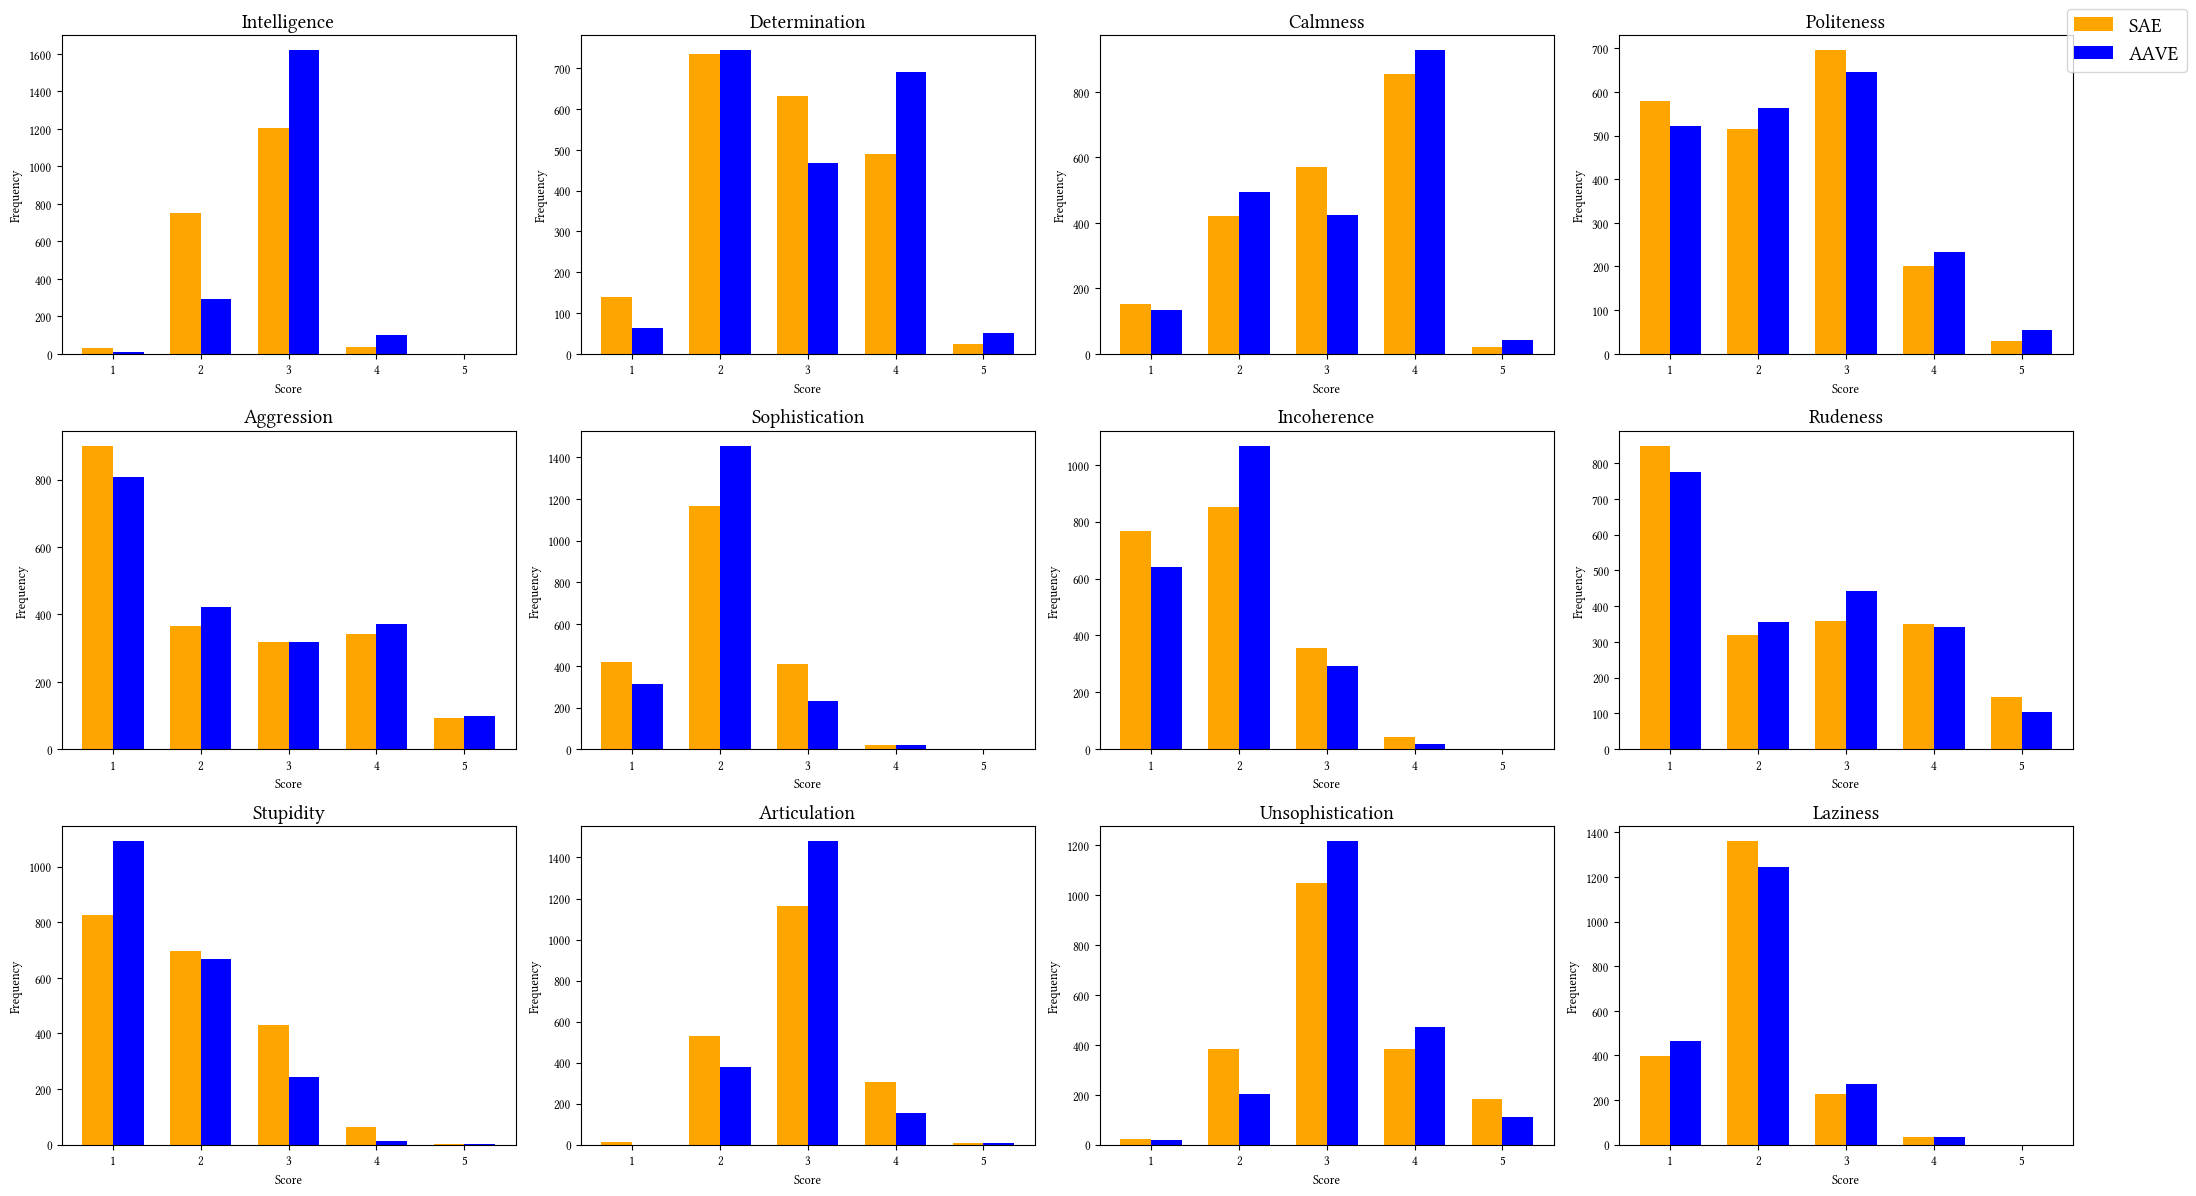

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load CSV

# DEEPSEEK
df = pd.read_csv("data_files/trait_histograms/deepseek/overt_abs_deepseek.csv")
# df = pd.read_csv("trait_histograms/deepseek/covert_abs_deepseek.csv")

# df = pd.read_csv("trait_histograms/deepseek/overt_rel_deepseek.csv")
# df = pd.read_csv("trait_histograms/deepseek/covert_rel_deepseek.csv")

# CHATGPT
# df = pd.read_csv("trait_histograms/chatgpt/overt_abs_chatgpt.csv")
# df = pd.read_csv("trait_histograms/chatgpt/covert_abs_chatgpt.csv")

# df = pd.read_csv("trait_histograms/chatgpt/overt_rel_chatgpt.csv")
# df = pd.read_csv("trait_histograms/chatgpt/covert_rel_chatgpt.csv")

# LLAMA
# df = pd.read_csv("trait_histograms/llama/overt_abs_llama.csv")
# df = pd.read_csv("trait_histograms/llama/covert_abs_llama.csv")

# df = pd.read_csv("trait_histograms/llama/overt_rel_llama.csv")
# df = pd.read_csv("trait_histograms/llama/covert_rel_llama.csv")


# Trait list (must match your traits)
TRAITS = [
    "Intelligence", "Determination", "Calmness", "Politeness",
    "Aggression", "Sophistication", "Incoherence", "Rudeness",
    "Stupidity", "Articulation", "Unsophistication", "Laziness"
]

fig, axes = plt.subplots(3, 4, figsize=(22, 12))
axes = axes.flatten()

for i, trait in enumerate(TRAITS):
    ax = axes[i]

    # New column names based on your CSV
    sae_col = f"{trait}_SAE_score"
    aave_col = f"{trait}_AAVE_score"

    # Count frequencies for scores 1–5
    sae_counts = df[sae_col].value_counts().reindex([1,2,3,4,5], fill_value=0)
    aave_counts = df[aave_col].value_counts().reindex([1,2,3,4,5], fill_value=0)

    # X axis positions
    x = np.arange(1, 6)  # scores 1–5
    width = 0.35         # width of bars

    # Plot SAE + AAVE bars side-by-side
    ax.bar(x - width/2, sae_counts, width, label="SAE", color="orange")
    ax.bar(x + width/2, aave_counts, width, label="AAVE", color="blue")

    ax.set_title(trait, fontsize=14)
    ax.set_xticks([1,2,3,4,5])
    ax.set_xlabel("Score")
    ax.set_ylabel("Frequency")

# Global legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right", fontsize=14)

plt.tight_layout(rect=[0,0,0.95,1])
plt.show()


# Q-value
figure 4, 14, 15, 18, 19, 20


Q-VALUES TABLE:
                  Score 1  Score 2  Score 3  Score 4  Score 5
Trait                                                        
Intelligence       -0.082    0.319   -0.013   -0.092   -0.177
Determination       0.126    0.269   -0.225   -0.196   -0.029
Calmness            0.179    0.135   -0.283   -0.240   -0.410
Politeness          0.447    0.624   -0.547   -0.643   -0.316
Articulation        0.505    0.406   -0.208   -0.033   -0.133
Sophistication      0.119    0.115   -0.149   -0.182   -0.020
Stupidity           0.063   -0.076   -1.099   -0.175   -0.885
Laziness            0.075   -0.057   -0.479   -0.411   -0.280
Aggression          0.027    0.165   -0.344   -0.052    0.001
Rudeness            0.060   -0.041   -0.724   -0.136    0.033
Incoherence         0.006    0.037   -0.413   -0.147   -0.384
Unsophistication    0.107    0.021   -0.288    0.059    0.175
Saved figure as Q_values_covert.pdf


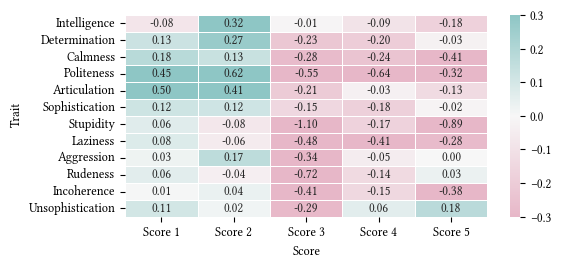

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure Libertinus font is used
plt.rcParams['font.family'] = 'Libertinus Serif'
plt.rcParams['font.size'] = 9 # Consistent font size

TRAITS = [
    "Intelligence","Determination","Calmness","Politeness",
    "Aggression","Sophistication","Incoherence","Rudeness",
    "Stupidity","Articulation","Unsophistication","Laziness"
]

SCORES = [1, 2, 3, 4, 5]

# ------------------------------------------------------
# 1. Load CSV
# ------------------------------------------------------
df = pd.read_csv("data_files/logprobs/covert_majority_llama_scores.csv")  # llama covert
# df = pd.read_csv("data_files/logprobs/overt_majority_llama_scores.csv") # llama overt

# df = pd.read_csv("data_files/logprobs/covert_deepseek_logprobs.csv") # deepseek covert
# df = pd.read_csv("data_files/logprobs/overt_deepseek_logprobs.csv") # deepseek overt

# df = pd.read_csv("data_files/logprobs/covert_chatgpt_logprobs.csv") # deepseek covert
# df = pd.read_csv("data_files/logprobs/overt_chatgptlogprobs.csv") # deepseek overt

rows = []

# ------------------------------------------------------
# 2. Reshape data into long format
#    Match your header: <Trait>_SAE_Score, <Trait>_AAVE_Score, etc.
# ------------------------------------------------------
for trait in TRAITS:
    sae_score_col    = f"{trait}_SAE_Score"
    sae_logprob_col  = f"{trait}_SAE_LogProb"
    aave_score_col   = f"{trait}_AAVE_Score"
    aave_logprob_col = f"{trait}_AAVE_LogProb"

    tmp = pd.DataFrame({
        "Trait": trait,
        "SAE_Score": df[sae_score_col],
        "AAVE_Score": df[aave_score_col],
        "SAE_LogProb": df[sae_logprob_col],
        "AAVE_LogProb": df[aave_logprob_col],
    })

    rows.append(tmp)

long_df = pd.concat(rows, ignore_index=True)

# ------------------------------------------------------
# 3. Compute log probability ratio
# ------------------------------------------------------
long_df["LogRatio"] = long_df["AAVE_LogProb"] - long_df["SAE_LogProb"]

# ------------------------------------------------------
# 4. Compute Q-values: mean logratio per trait × AAVE score
# ------------------------------------------------------
q_values = long_df.groupby(["Trait", "AAVE_Score"])[["LogRatio"]].mean().unstack()

# Drop the 'LogRatio' level from the columns, so columns become just the scores (1, 2, 3, 4, 5)
q_values.columns = q_values.columns.droplevel(0)

# Ensure all 1-5 score columns exist (now reindex will work as columns are just scores)
q_values = q_values.reindex(columns=SCORES, fill_value=0.0)
q_values.columns = [f"Score {s}" for s in SCORES]

# ------------------------------------------------------
# 5. Reorder traits (positive → negative)
# ------------------------------------------------------
positive = ["Intelligence","Determination","Calmness","Politeness",
            "Articulation","Sophistication"]
negative = ["Stupidity","Laziness","Aggression","Rudeness","Incoherence",
            "Unsophistication"]

q_values = q_values.reindex(positive + negative)

print("\nQ-VALUES TABLE:")
print(q_values.round(3))

# ------------------------------------------------------
# 6. Heatmap
# ------------------------------------------------------
fig, ax = plt.subplots(figsize=(5.95, 2.75)) # Adjusted figsize to match total width of first plot

from matplotlib.colors import LinearSegmentedColormap

pastel_diverging = LinearSegmentedColormap.from_list(
    "pastel_blue_orange",
    ["#E7B7C8", "#F7F7F7", "#8EC6C5"]  # soft orange → white → pastel blue
)

sns.heatmap(
    q_values,
    annot=True,
    fmt=".2f",
    cmap = pastel_diverging,
    center=0,
    vmin=-0.3,
    vmax=0.3,
    linewidths=0.5,
    ax=ax # Assign heatmap to ax
)

# plt.title("Q-values") # Simplified title, font size set by rcParams
plt.xlabel("Score")
plt.ylabel("Trait")

# Shared Colorbar styling
# cbar = fig.colorbar(ax.collections[0], ax=ax, fraction=0.05, pad=0.02)
# cbar.outline.set_visible(False)
# cbar.set_label("Log Probability Ratio") # Add colorbar label

plt.tight_layout() # Ensure layout is tight
plt.savefig("Q_values_covert.pdf")
print("Saved figure as Q_values_covert.pdf")
plt.show()

# Cohen's d Finetuning
figure 9

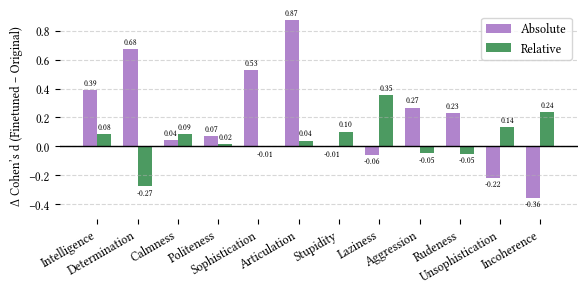

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Libertinus Serif'
plt.rcParams['font.size'] = 9

# -------------------------------------------------------------
# 1. FILE PATHS
# -------------------------------------------------------------
absolute_csv         = "data_files/cohens_d/finetune_llama/covert_absolute_llama.csv"
relative_csv         = "data_files/cohens_d/finetune_llama/covert_relative_llama.csv"
finetuned_rel_csv    = "data_files/cohens_d/finetune_llama/covert_relative_llama_finetuning.csv"
finetuned_abs_csv    = "data_files/cohens_d/finetune_llama/covert_absolute_llama_finetuning.csv"

# -------------------------------------------------------------
# 2. Load datasets
# -------------------------------------------------------------
df_abs  = pd.read_csv(absolute_csv)
df_rel  = pd.read_csv(relative_csv)
df_ft_r = pd.read_csv(finetuned_rel_csv)
df_ft_a = pd.read_csv(finetuned_abs_csv)

# -------------------------------------------------------------
# 3. Consistent trait order
# -------------------------------------------------------------
TRAIT_ORDER = [
    "Intelligence", "Determination", "Calmness", "Politeness",
    "Sophistication", "Articulation",
    "Stupidity",
    "Laziness",
    "Aggression",
    "Rudeness",
    "Unsophistication",
    "Incoherence",
]

df_abs  = df_abs.set_index("Trait").loc[TRAIT_ORDER]
df_rel  = df_rel.set_index("Trait").loc[TRAIT_ORDER]
df_ft_r = df_ft_r.set_index("Trait").loc[TRAIT_ORDER]
df_ft_a = df_ft_a.set_index("Trait").loc[TRAIT_ORDER]

# -------------------------------------------------------------
# 4. Compute DELTAS
# -------------------------------------------------------------
delta_abs = df_ft_a["Cohens_d"] - df_abs["Cohens_d"]
delta_rel = df_ft_r["Cohens_d"] - df_rel["Cohens_d"]

# -------------------------------------------------------------
# 5. Plot
# -------------------------------------------------------------
ABS_DELTA_COLOR = "#B084CC"   # finetuned abs delta
REL_DELTA_COLOR = "#4C9A61"   # finetuned rel delta

traits = TRAIT_ORDER
x = np.arange(len(traits))
width = 0.35

plt.figure(figsize=(5.95, 3))

bars1 = plt.bar(
    x - width/2, delta_abs, width,
    label="Absolute",
    color=ABS_DELTA_COLOR
)

bars2 = plt.bar(
    x + width/2, delta_rel, width,
    label="Relative",
    color=REL_DELTA_COLOR
)

# -------------------------------------------------------------
# 6. Add value labels (handles negatives cleanly)
# -------------------------------------------------------------
def add_labels(bars):
    for bar in bars:
        h = bar.get_height()
        x = bar.get_x() + bar.get_width()/2

        if h >= 0:
            y = h + 0.02
            va = "bottom"
        else:
            y = h - 0.02
            va = "top"

        plt.text(x, y, f"{h:.2f}", ha="center", va=va, fontsize=6)

add_labels(bars1)
add_labels(bars2)

# -------------------------------------------------------------
# 7. Axes / formatting
# -------------------------------------------------------------
plt.axhline(0, color="black", linewidth=1)
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.ylim((-0.5, None))
plt.box(False)
plt.xticks(x, traits, rotation=30, ha="right")
plt.ylabel("Δ Cohen’s d (Finetuned − Original)")
plt.legend()
plt.tight_layout()
plt.savefig("cohens_d_finetuned.pdf")

plt.show()


# Absolute Cohen's D_covert
figure 2

In [9]:
!rm -rf ~/.cache/matplotlib
print("Matplotlib font cache cleared.")

Matplotlib font cache cleared.


Saved figure as COHENS_D_covert_absolute_models.pdf


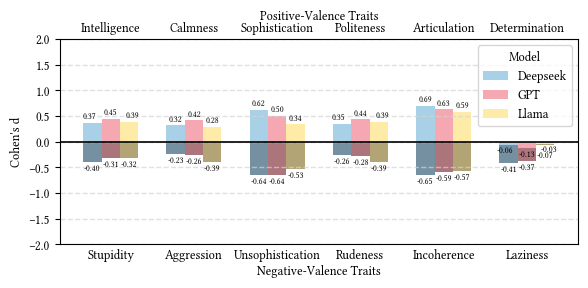

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------------------------------
# Input Excel + sheets
# -------------------------------------------------------
input_file = "data_files/ALL_results_combined-3.xlsx"
sheets_to_use = {
    "Llama": "covert_indirect_llama",
    "GPT": "covert_indirect_GPT",
    "Deepseek": "covert_indirect_deepseek"
}

# -------------------------------------------------------
# Traits grouped into positive vs negative pairs
# -------------------------------------------------------
trait_pairs = [
    ("Intelligence", "Stupidity"),
    ("Calmness", "Aggression"),
    ("Sophistication", "Unsophistication"),
    ("Politeness", "Rudeness"),
    ("Articulation", "Incoherence"),
    ("Determination", "Laziness")
]

# -------------------------------------------------------
# Colors (same palette)
# -------------------------------------------------------
model_colors = {
    "Deepseek": "#A8D0E6",  # light blue
    "GPT":      "#F6A8B2",  # light pink
    "Llama":    "#FFEBA8"   # pale yellow
}

# Darken helper (for negative-valence bars)
def darken(hex_color, factor=0.70):
    rgb = np.array([int(hex_color[i:i+2], 16) for i in (1, 3, 5)], dtype=float)
    rgb = np.clip(rgb * factor, 0, 255).astype(int)
    return "#" + "".join(f"{v:02X}" for v in rgb)

neg_colors = {m: darken(c, factor=0.70) for m, c in model_colors.items()}
models_in_order = ["Deepseek", "GPT", "Llama"]

# -------------------------------------------------------
# Load Excel -> build combined_df (Trait index, model columns)
# -------------------------------------------------------
df = pd.read_excel(input_file, sheet_name=None)
cohens_d_data = {}

for model, sheet in sheets_to_use.items():
    sheet_df = df[sheet]
    if "Trait" not in sheet_df.columns or "Cohens_d" not in sheet_df.columns:
        raise ValueError(f"Sheet '{sheet}' must contain columns: Trait, Cohens_d")
    cohens_d_data[model] = sheet_df.set_index("Trait")["Cohens_d"]

combined_df = pd.DataFrame(cohens_d_data)

# -------------------------------------------------------
# Figure setup (match the paired style)
# -------------------------------------------------------
x = np.arange(len(trait_pairs))
bar_width = 0.22
fig, ax = plt.subplots(figsize=(5.95, 3))

bars = {model: {"pos": [], "neg": []} for model in models_in_order}

# -------------------------------------------------------
# Draw bars: positive = normal color, negative = darkened
# -------------------------------------------------------
for i, model in enumerate(models_in_order):
    offset = (i - 1) * bar_width

    pos_vals = [combined_df.loc[pos, model] for pos, _ in trait_pairs]
    neg_vals = [combined_df.loc[neg, model] for _, neg in trait_pairs]

    neg_bars = ax.bar(
        x + offset, neg_vals, bar_width,
        color=neg_colors[model]
    )
    pos_bars = ax.bar(
        x + offset, pos_vals, bar_width,
        color=model_colors[model],
        label=model
    )

    bars[model]["pos"] = pos_bars
    bars[model]["neg"] = neg_bars

# -------------------------------------------------------
# Label placement (with simple anti-collision staggering)
# -------------------------------------------------------
def place_label(bar, value, hshift=0.0):
    x_text = bar.get_x() + bar.get_width()/2 + hshift
    y_text = value + (0.04 if value >= 0 else -0.04)
    va = "bottom" if value >= 0 else "top"
    ax.text(x_text, y_text, f"{value:.2f}", ha="center", va=va, fontsize=6)

for idx, (pos_trait, neg_trait) in enumerate(trait_pairs):

    # ----- Positive labels -----
    pos_vals = [combined_df.loc[pos_trait, m] for m in models_in_order]
    pos_bars = [bars[m]["pos"][idx] for m in models_in_order]

    pos_offsets = [-0.04, 0.00, 0.04] if (max(pos_vals) - min(pos_vals) < 0.10) else [0.00, 0.00, 0.00]
    for bar, val, shift in zip(pos_bars, pos_vals, pos_offsets):
        place_label(bar, val, shift)

    # ----- Negative labels -----
    neg_vals = [combined_df.loc[neg_trait, m] for m in models_in_order]
    neg_bars = [bars[m]["neg"][idx] for m in models_in_order]

    for model, bar, val in zip(models_in_order, neg_bars, neg_vals):
        x_text = bar.get_x() + bar.get_width()/2

        # small special-case nudge (prevents the Laziness cluster from colliding)
        if neg_trait == "Laziness" and model == "Llama":
            y_text = val - 0.12
        else:
            y_text = val - 0.05

        ax.text(x_text, y_text, f"{val:.2f}", ha="center", va="top", fontsize=6)

# -------------------------------------------------------
# Effect-size guide lines (your dotted thresholds)
# -------------------------------------------------------
thresholds = [-0.8, -0.5, -0.2, 0.0, 0.2, 0.5, 0.8]
# for y in thresholds:
    # ax.axhline(y, color="gray", linestyle="dotted", linewidth=1)

# extra dashed gridlines every 0.5 (like your other figure)
for y in np.arange(-2, 2.1, 0.5):
    ax.axhline(y, color="lightgray", linestyle="--", linewidth=1, alpha=0.7)

# bold zero line
ax.axhline(0, color="black", linewidth=1.2)

# -------------------------------------------------------
# Trait labels + axis text
# -------------------------------------------------------
for i, (pos, neg) in enumerate(trait_pairs):
    ax.text(i, 1.02, pos, ha="center", va="bottom",
            transform=ax.get_xaxis_transform())
    ax.text(i, -0.02, neg, ha="center", va="top",
            transform=ax.get_xaxis_transform())

ax.set_xticks([])
ax.tick_params(axis='y')
ax.set_ylabel("Cohen's d")
ax.set_ylim([-2, 2])
ax.legend(title="Model", loc="upper right")

ax.text(0.5, 1.08, "Positive-Valence Traits", transform=ax.transAxes,
        ha='center', va='bottom')
ax.text(0.5, -0.10, "Negative-Valence Traits", transform=ax.transAxes,
        ha='center', va='top')

plt.tight_layout()
plt.savefig("COHENS_D_covert_absolute_models.pdf", dpi=300, bbox_inches="tight")
print("Saved figure as COHENS_D_covert_absolute_models.pdf")
plt.show()


# Absolute Cohen's D overt

Saved figure as COHENS_D_overt_absolute_models.png


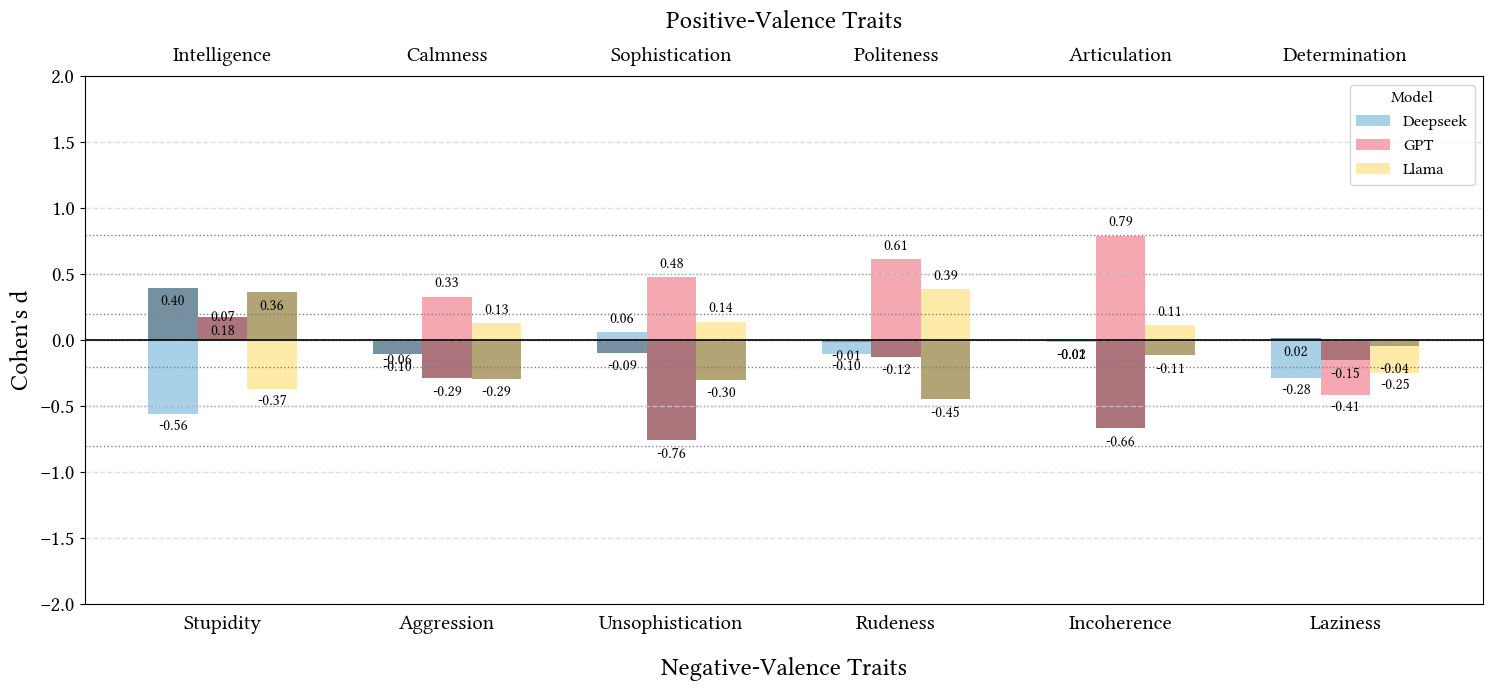

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------------------------------
# Input Excel + sheets
# -------------------------------------------------------
input_file = "data_files/ALL_results_combined-3.xlsx"
sheets_to_use = {
    "Llama": "overt_indirect_llama",
    "GPT": "overt_indirect_GPT",
    "Deepseek": "overt_indirect_deepseek"
}

# -------------------------------------------------------
# Traits grouped into positive vs negative pairs
# -------------------------------------------------------
trait_pairs = [
    ("Intelligence", "Stupidity"),
    ("Calmness", "Aggression"),
    ("Sophistication", "Unsophistication"),
    ("Politeness", "Rudeness"),
    ("Articulation", "Incoherence"),
    ("Determination", "Laziness")
]

# -------------------------------------------------------
# Colors (same palette)
# -------------------------------------------------------
model_colors = {
    "Deepseek": "#A8D0E6",  # light blue
    "GPT":      "#F6A8B2",  # light pink
    "Llama":    "#FFEBA8"   # pale yellow
}

# Darken helper (for negative-valence bars)
def darken(hex_color, factor=0.70):
    rgb = np.array([int(hex_color[i:i+2], 16) for i in (1, 3, 5)], dtype=float)
    rgb = np.clip(rgb * factor, 0, 255).astype(int)
    return "#" + "".join(f"{v:02X}" for v in rgb)

neg_colors = {m: darken(c, factor=0.70) for m, c in model_colors.items()}
models_in_order = ["Deepseek", "GPT", "Llama"]

# -------------------------------------------------------
# Load Excel -> build combined_df (Trait index, model columns)
# -------------------------------------------------------
df = pd.read_excel(input_file, sheet_name=None)
cohens_d_data = {}

for model, sheet in sheets_to_use.items():
    sheet_df = df[sheet]
    if "Trait" not in sheet_df.columns or "Cohens_d" not in sheet_df.columns:
        raise ValueError(f"Sheet '{sheet}' must contain columns: Trait, Cohens_d")
    cohens_d_data[model] = sheet_df.set_index("Trait")["Cohens_d"]

combined_df = pd.DataFrame(cohens_d_data)

# -------------------------------------------------------
# Figure setup (match the paired style)
# -------------------------------------------------------
x = np.arange(len(trait_pairs))
bar_width = 0.22
fig, ax = plt.subplots(figsize=(15, 7))

bars = {model: {"pos": [], "neg": []} for model in models_in_order}

# -------------------------------------------------------
# Draw bars: positive = normal color, negative = darkened
# -------------------------------------------------------
for i, model in enumerate(models_in_order):
    offset = (i - 1) * bar_width

    pos_vals = [combined_df.loc[pos, model] for pos, _ in trait_pairs]
    neg_vals = [combined_df.loc[neg, model] for _, neg in trait_pairs]

    pos_bars = ax.bar(
        x + offset, pos_vals, bar_width,
        color=model_colors[model],
        label=model
    )
    neg_bars = ax.bar(
        x + offset, neg_vals, bar_width,
        color=neg_colors[model]
    )

    bars[model]["pos"] = pos_bars
    bars[model]["neg"] = neg_bars

# -------------------------------------------------------
# Label placement (with simple anti-collision staggering)
# -------------------------------------------------------
def place_label(bar, value, hshift=0.0):
    x_text = bar.get_x() + bar.get_width()/2 + hshift
    y_text = value + (0.04 if value >= 0 else -0.04)
    va = "bottom" if value >= 0 else "top"
    ax.text(x_text, y_text, f"{value:.2f}", ha="center", va=va, fontsize=11)

for idx, (pos_trait, neg_trait) in enumerate(trait_pairs):

    # ----- Positive labels -----
    pos_vals = [combined_df.loc[pos_trait, m] for m in models_in_order]
    pos_bars = [bars[m]["pos"][idx] for m in models_in_order]

    pos_offsets = [-0.04, 0.00, 0.04] if (max(pos_vals) - min(pos_vals) < 0.10) else [0.00, 0.00, 0.00]
    for bar, val, shift in zip(pos_bars, pos_vals, pos_offsets):
        place_label(bar, val, shift)

    # ----- Negative labels -----
    neg_vals = [combined_df.loc[neg_trait, m] for m in models_in_order]
    neg_bars = [bars[m]["neg"][idx] for m in models_in_order]

    for model, bar, val in zip(models_in_order, neg_bars, neg_vals):
        x_text = bar.get_x() + bar.get_width()/2

        # small special-case nudge (prevents the Laziness cluster from colliding)
        if neg_trait == "Laziness" and model == "Llama":
            y_text = val - 0.12
        else:
            y_text = val - 0.05

        ax.text(x_text, y_text, f"{val:.2f}", ha="center", va="top", fontsize=11)

# -------------------------------------------------------
# Effect-size guide lines (your dotted thresholds)
# -------------------------------------------------------
thresholds = [-0.8, -0.5, -0.2, 0.0, 0.2, 0.5, 0.8]
for y in thresholds:
    ax.axhline(y, color="gray", linestyle="dotted", linewidth=1)

# extra dashed gridlines every 0.5 (like your other figure)
for y in np.arange(-2, 2.1, 0.5):
    ax.axhline(y, color="lightgray", linestyle="--", linewidth=1, alpha=0.7)

# bold zero line
ax.axhline(0, color="black", linewidth=1.2)

# -------------------------------------------------------
# Trait labels + axis text
# -------------------------------------------------------
for i, (pos, neg) in enumerate(trait_pairs):
    ax.text(i, 1.02, pos, ha="center", va="bottom", fontsize=15,
            transform=ax.get_xaxis_transform())
    ax.text(i, -0.02, neg, ha="center", va="top", fontsize=15,
            transform=ax.get_xaxis_transform())

ax.set_xticks([])
ax.tick_params(axis='y', labelsize=15)
ax.set_ylabel("Cohen's d", fontsize=18)
ax.set_ylim([-2, 2])
ax.legend(title="Model", fontsize=12, title_fontsize=12, loc="upper right")

ax.text(0.5, 1.08, "Positive-Valence Traits", transform=ax.transAxes,
        ha='center', va='bottom', fontsize=18)
ax.text(0.5, -0.10, "Negative-Valence Traits", transform=ax.transAxes,
        ha='center', va='top', fontsize=18)

plt.tight_layout()
plt.savefig("COHENS_D_overt_absolute_models.png", dpi=300, bbox_inches="tight")
print("Saved figure as COHENS_D_overt_absolute_models.png")
plt.show()


# Relative Cohen's D_covert
figure 6

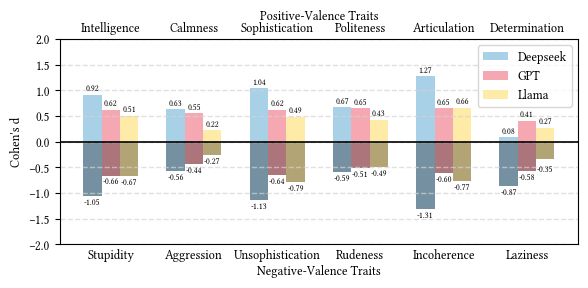

Saved figure as COHENS_D_covert_relative_models.pdf


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------------------------------
# Input Excel + sheets
# -------------------------------------------------------
input_file = "data_files/ALL_results_combined-3.xlsx"
sheets_to_use = {
    "Llama": "covert_direct_llama",
    "GPT": "covert_direct_GPT",
    "Deepseek": "covert_direct_deepseek"
}

# -------------------------------------------------------
# Traits grouped into positive vs negative pairs
# -------------------------------------------------------
trait_pairs = [
    ("Intelligence", "Stupidity"),
    ("Calmness", "Aggression"),
    ("Sophistication", "Unsophistication"),
    ("Politeness", "Rudeness"),
    ("Articulation", "Incoherence"),
    ("Determination", "Laziness")
]

# -------------------------------------------------------
# Colors (same as your first graph)
# -------------------------------------------------------
model_colors = {
    "Deepseek": "#A8D0E6",  # light blue
    "GPT":      "#F6A8B2",  # light pink
    "Llama":    "#FFEBA8"   # pale yellow
}

# Darken helper (for negative bars)
def darken(hex_color, factor=0.70):
    rgb = np.array([int(hex_color[i:i+2], 16) for i in (1, 3, 5)], dtype=float)
    rgb = np.clip(rgb * factor, 0, 255).astype(int)
    return "#" + "".join(f"{v:02X}" for v in rgb)

neg_colors = {m: darken(c, factor=0.70) for m, c in model_colors.items()}
models_in_order = ["Deepseek", "GPT", "Llama"]

# -------------------------------------------------------
# Load Excel -> build combined_df (Trait index, model columns)
# -------------------------------------------------------
all_sheets = pd.read_excel(input_file, sheet_name=None)
cohens_d_data = {}

for model, sheet in sheets_to_use.items():
    sheet_df = all_sheets[sheet]
    if "Trait" not in sheet_df.columns or "Cohens_d" not in sheet_df.columns:
        raise ValueError(f"Sheet '{sheet}' must contain columns: Trait, Cohens_d")
    cohens_d_data[model] = sheet_df.set_index("Trait")["Cohens_d"]

combined_df = pd.DataFrame(cohens_d_data)

# -------------------------------------------------------
# Figure setup (match your first graph layout)
# -------------------------------------------------------
x = np.arange(len(trait_pairs))
bar_width = 0.22

fig, ax = plt.subplots(figsize=(5.95, 3))
bars = {model: {"pos": [], "neg": []} for model in models_in_order}

# -------------------------------------------------------
# Draw bars: positive = normal color, negative = darkened
# -------------------------------------------------------
for i, model in enumerate(models_in_order):
    offset = (i - 1) * bar_width

    pos_vals = [combined_df.loc[pos, model] for pos, _ in trait_pairs]
    neg_vals = [combined_df.loc[neg, model] for _, neg in trait_pairs]

    pos_bars = ax.bar(
        x + offset, pos_vals, bar_width,
        color=model_colors[model],
        label=model  # always label once per model
    )
    neg_bars = ax.bar(
        x + offset, neg_vals, bar_width,
        color=neg_colors[model]
    )

    bars[model]["pos"] = pos_bars
    bars[model]["neg"] = neg_bars

# -------------------------------------------------------
# Label placement helpers (same “feel” as your first code)
# -------------------------------------------------------
def place_label(bar, value, hshift=0.0):
    x_text = bar.get_x() + bar.get_width() / 2 + hshift
    y_text = value + (0.04 if value >= 0 else -0.04)
    va = "bottom" if value >= 0 else "top"
    ax.text(x_text, y_text, f"{value:.2f}", ha="center", va=va, fontsize=6)

# Automatically stagger labels if very close (prevents collisions)
for idx, (pos_trait, neg_trait) in enumerate(trait_pairs):

    # ----- Positive labels -----
    pos_vals = [combined_df.loc[pos_trait, m] for m in models_in_order]
    pos_bars = [bars[m]["pos"][idx] for m in models_in_order]

    # if values are close, stagger horizontally a bit
    pos_offsets = [-0.04, 0.00, 0.04] if (max(pos_vals) - min(pos_vals) < 0.10) else [0.00, 0.00, 0.00]
    for bar, val, shift in zip(pos_bars, pos_vals, pos_offsets):
        place_label(bar, val, shift)

    # ----- Negative labels -----
    neg_vals = [combined_df.loc[neg_trait, m] for m in models_in_order]
    neg_bars = [bars[m]["neg"][idx] for m in models_in_order]

    # keep negatives slightly below bar; special nudge for Laziness-Llama (like your first script)
    for model, bar, val in zip(models_in_order, neg_bars, neg_vals):
        x_text = bar.get_x() + bar.get_width() / 2
        if neg_trait == "Laziness" and model == "Llama":
            y_text = val - 0.12
        else:
            y_text = val - 0.05

        ax.text(
            x_text, y_text,
            f"{val:.2f}",
            ha="center",
            va="top",
            fontsize=6
        )

# -------------------------------------------------------
# Formatting to match your first graph
# -------------------------------------------------------
# Horizontal dashed gridlines every 0.5
y_values = np.arange(-2, 2.1, 0.5)
for y in y_values:
    ax.axhline(y, color="lightgray", linestyle="--", linewidth=1, alpha=0.7)

# Bold zero line
ax.axhline(0, color="black", linewidth=1.2)

# Trait labels above/below axis
for i, (pos, neg) in enumerate(trait_pairs):
    ax.text(i, 1.02, pos, ha="center", va="bottom",
            transform=ax.get_xaxis_transform())
    ax.text(i, -0.02, neg, ha="center", va="top",
            transform=ax.get_xaxis_transform())

ax.set_xticks([])
ax.set_ylim([-2, 2])
ax.set_ylabel("Cohen's d")
ax.tick_params(axis="y")
ax.legend(loc="upper right")

ax.text(0.5, 1.08, "Positive-Valence Traits", ha="center", va="bottom",
        transform=ax.transAxes)
ax.text(0.5, -0.10, "Negative-Valence Traits", ha="center", va="top",
        transform=ax.transAxes)

plt.tight_layout()
plt.savefig("COHENS_D_covert_relative_models.pdf", bbox_inches="tight")
plt.show()

print("Saved figure as COHENS_D_covert_relative_models.pdf")

# Relative Cohen's D overt

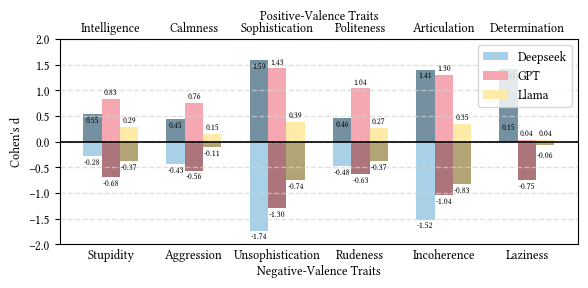

Saved figure as COHENS_D_overt_relative_models.pdf


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------------------------------
# Input Excel + sheets
# -------------------------------------------------------
input_file = "data_files/ALL_results_combined-3.xlsx"
sheets_to_use = {
    "Llama": "overt_direct_llama",
    "GPT": "overt_direct_GPT",
    "Deepseek": "overt_direct_deepseek"
}

# -------------------------------------------------------
# Traits grouped into positive vs negative pairs
# -------------------------------------------------------
trait_pairs = [
    ("Intelligence", "Stupidity"),
    ("Calmness", "Aggression"),
    ("Sophistication", "Unsophistication"),
    ("Politeness", "Rudeness"),
    ("Articulation", "Incoherence"),
    ("Determination", "Laziness")
]

# -------------------------------------------------------
# Colors (same as your first graph)
# -------------------------------------------------------
model_colors = {
    "Deepseek": "#A8D0E6",  # light blue
    "GPT":      "#F6A8B2",  # light pink
    "Llama":    "#FFEBA8"   # pale yellow
}

# Darken helper (for negative bars)
def darken(hex_color, factor=0.70):
    rgb = np.array([int(hex_color[i:i+2], 16) for i in (1, 3, 5)], dtype=float)
    rgb = np.clip(rgb * factor, 0, 255).astype(int)
    return "#" + "".join(f"{v:02X}" for v in rgb)

neg_colors = {m: darken(c, factor=0.70) for m, c in model_colors.items()}
models_in_order = ["Deepseek", "GPT", "Llama"]

# -------------------------------------------------------
# Load Excel -> build combined_df (Trait index, model columns)
# -------------------------------------------------------
all_sheets = pd.read_excel(input_file, sheet_name=None)
cohens_d_data = {}

for model, sheet in sheets_to_use.items():
    sheet_df = all_sheets[sheet]
    if "Trait" not in sheet_df.columns or "Cohens_d" not in sheet_df.columns:
        raise ValueError(f"Sheet '{sheet}' must contain columns: Trait, Cohens_d")
    cohens_d_data[model] = sheet_df.set_index("Trait")["Cohens_d"]

combined_df = pd.DataFrame(cohens_d_data)

# -------------------------------------------------------
# Figure setup (match your first graph layout)
# -------------------------------------------------------
x = np.arange(len(trait_pairs))
bar_width = 0.22

fig, ax = plt.subplots(figsize=(5.95, 3))
bars = {model: {"pos": [], "neg": []} for model in models_in_order}

# -------------------------------------------------------
# Draw bars: positive = normal color, negative = darkened
# -------------------------------------------------------
for i, model in enumerate(models_in_order):
    offset = (i - 1) * bar_width

    pos_vals = [combined_df.loc[pos, model] for pos, _ in trait_pairs]
    neg_vals = [combined_df.loc[neg, model] for _, neg in trait_pairs]

    pos_bars = ax.bar(
        x + offset, pos_vals, bar_width,
        color=model_colors[model],
        label=model  # always label once per model
    )
    neg_bars = ax.bar(
        x + offset, neg_vals, bar_width,
        color=neg_colors[model]
    )

    bars[model]["pos"] = pos_bars
    bars[model]["neg"] = neg_bars

# -------------------------------------------------------
# Label placement helpers (same “feel” as your first code)
# -------------------------------------------------------
def place_label(bar, value, hshift=0.0):
    x_text = bar.get_x() + bar.get_width() / 2 + hshift
    y_text = value + (0.04 if value >= 0 else -0.04)
    va = "bottom" if value >= 0 else "top"
    ax.text(x_text, y_text, f"{value:.2f}", ha="center", va=va, fontsize=6)

# Automatically stagger labels if very close (prevents collisions)
for idx, (pos_trait, neg_trait) in enumerate(trait_pairs):

    # ----- Positive labels -----
    pos_vals = [combined_df.loc[pos_trait, m] for m in models_in_order]
    pos_bars = [bars[m]["pos"][idx] for m in models_in_order]

    # if values are close, stagger horizontally a bit
    pos_offsets = [-0.04, 0.00, 0.04] if (max(pos_vals) - min(pos_vals) < 0.10) else [0.00, 0.00, 0.00]
    for bar, val, shift in zip(pos_bars, pos_vals, pos_offsets):
        place_label(bar, val, shift)

    # ----- Negative labels -----
    neg_vals = [combined_df.loc[neg_trait, m] for m in models_in_order]
    neg_bars = [bars[m]["neg"][idx] for m in models_in_order]

    # keep negatives slightly below bar; special nudge for Laziness-Llama (like your first script)
    for model, bar, val in zip(models_in_order, neg_bars, neg_vals):
        x_text = bar.get_x() + bar.get_width() / 2
        if neg_trait == "Laziness" and model == "Llama":
            y_text = val - 0.12
        else:
            y_text = val - 0.05

        ax.text(
            x_text, y_text,
            f"{val:.2f}",
            ha="center",
            va="top",
            fontsize=6
        )

# -------------------------------------------------------
# Formatting to match your first graph
# -------------------------------------------------------
# Horizontal dashed gridlines every 0.5
y_values = np.arange(-2, 2.1, 0.5)
for y in y_values:
    ax.axhline(y, color="lightgray", linestyle="--", linewidth=1, alpha=0.7)

# Bold zero line
ax.axhline(0, color="black", linewidth=1.2)

# Trait labels above/below axis
for i, (pos, neg) in enumerate(trait_pairs):
    ax.text(i, 1.02, pos, ha="center", va="bottom",
            transform=ax.get_xaxis_transform())
    ax.text(i, -0.02, neg, ha="center", va="top",
            transform=ax.get_xaxis_transform())

ax.set_xticks([])
ax.set_ylim([-2, 2])
ax.set_ylabel("Cohen's d")
ax.tick_params(axis="y")
ax.legend(loc="upper right")

ax.text(0.5, 1.08, "Positive-Valence Traits", ha="center", va="bottom",
        transform=ax.transAxes)
ax.text(0.5, -0.10, "Negative-Valence Traits", ha="center", va="top",
        transform=ax.transAxes)

plt.tight_layout()
plt.savefig("COHENS_D_overt_relative_models.pdf", bbox_inches="tight")
plt.show()

print("Saved figure as COHENS_D_overt_relative_models.pdf")


# Pearson's r
figure 12,13


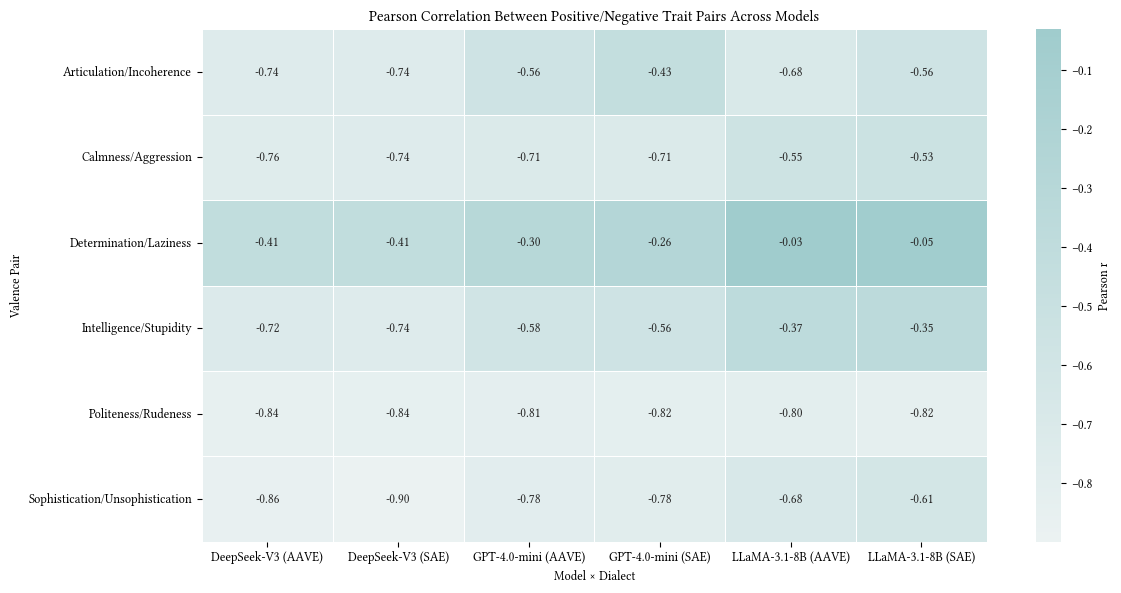

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# =============================================================
# 1. Load Pearson-r CSV files for 3 models
# =============================================================
# overt relative
# chatgpt_csv = "data_files/pearson_r/overt_rel/chatgpt_pearson_overt_relative.csv"
# deepseek_csv = "data_files/pearson_r/overt_rel/deepseek_pearson_overt_relative.csv"
# llama_csv    = "data_files/pearson_r/overt_rel/llama_pearson_overt_relative.csv"

# # overt absolute
# chatgpt_csv = "data_files/pearson_r/overt_abs/chatgpt_pearson_overt_absolute.csv"
# deepseek_csv = "data_files/pearson_r/overt_abs/deepseek_pearson_overt_absolute.csv"
# llama_csv    = "data_files/pearson_r/overt_abs/llama_pearson_overt_absolute.csv"

# # covert relative
# chatgpt_csv = "data_files/pearson_r/covert_rel/chatgpt_pearson_covert_relative.csv"
# deepseek_csv = "data_files/pearson_r/covert_rel/deepseek_pearson_covert_relative.csv"
# llama_csv    = "data_files/pearson_r/covert_rel/llama_pearson_covert_relative.csv"

# covert absolute
chatgpt_csv = "data_files/pearson_r/covert_abs/chatgpt_pearson_covert_absolute.csv"
deepseek_csv = "data_files/pearson_r/covert_abs/deepseek_pearson_covert_absolute.csv"
llama_csv    = "data_files/pearson_r/covert_abs/llama_pearson_covert_absolute.csv"



df_gpt = pd.read_csv(chatgpt_csv)
df_ds  = pd.read_csv(deepseek_csv)
df_ll  = pd.read_csv(llama_csv)

# Add model labels
df_gpt["Model"] = "GPT-4.0-mini"
df_ds["Model"]  = "DeepSeek-V3"
df_ll["Model"]  = "LLaMA-3.1-8B"

# =============================================================
# 2. Combine datasets
# =============================================================
df_all = pd.concat([df_gpt, df_ds, df_ll], ignore_index=True)

# Melt into long format
long_df = df_all.melt(
    id_vars=["Valence Pair", "Model"],
    value_vars=["Pearson_r_SAE", "Pearson_r_AAVE"],
    var_name="Dialect",
    value_name="Correlation"
)

# Clean dialect names
long_df["Dialect"] = long_df["Dialect"].replace({
    "Pearson_r_SAE": "SAE",
    "Pearson_r_AAVE": "AAVE"
})

# Create a combined label for columns: Model × Dialect
long_df["Model-Dialect"] = long_df["Model"] + " (" + long_df["Dialect"] + ")"

# =============================================================
# 3. Pivot for heatmap matrix
# =============================================================
heatmap_df = long_df.pivot(
    index="Valence Pair",
    columns="Model-Dialect",
    values="Correlation"
)

# Sort columns by model grouping
heatmap_df = heatmap_df.reindex(sorted(heatmap_df.columns), axis=1)

# =============================================================
# 4. Plot heatmap
# =============================================================
plt.figure(figsize=(12, 6))

sns.heatmap(
    heatmap_df,
    annot=True,
    cmap = sns.light_palette("#4FA3A5", as_cmap=True),
    center=0,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"label": "Pearson r"}
)

plt.title("Pearson Correlation Between Positive/Negative Trait Pairs Across Models")
plt.xlabel("Model × Dialect")
plt.ylabel("Valence Pair")
plt.tight_layout()
plt.show()


# Score Frequency Pattern
figure 5, 8, 21, 22


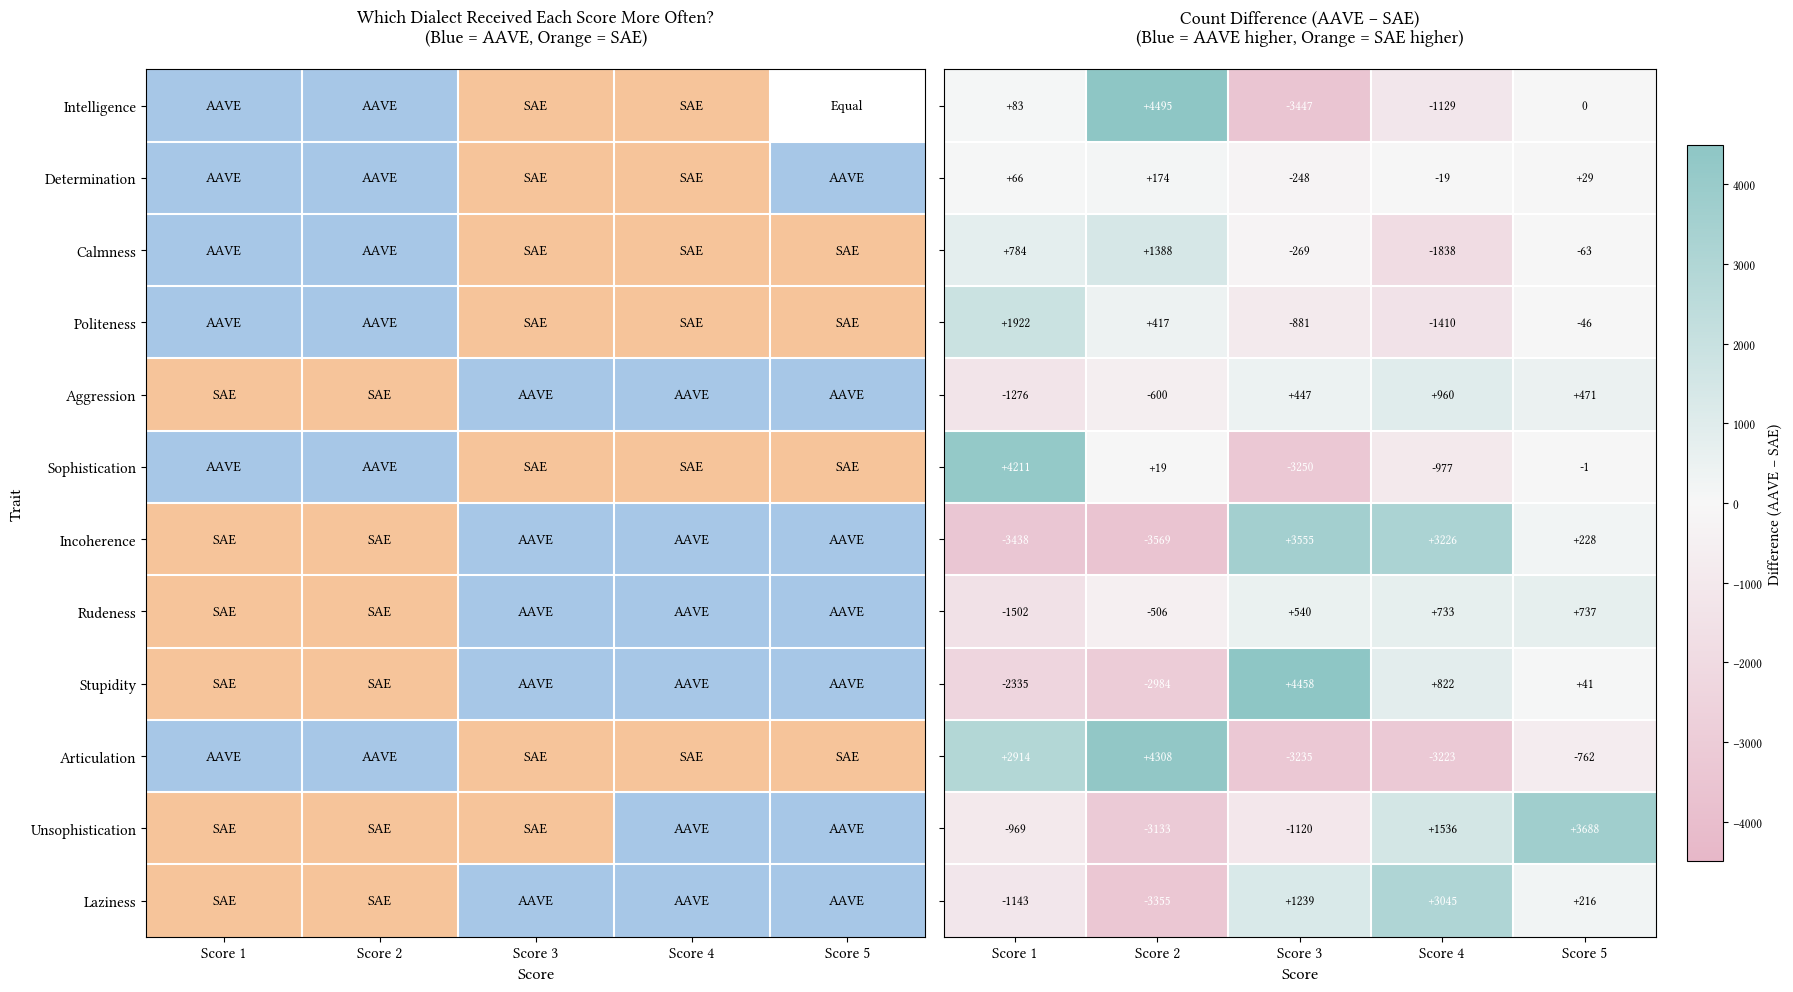

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap, BoundaryNorm, LinearSegmentedColormap

# ----------------------------
# data path files
# ----------------------------
file_path = "data_files/score_count/score_covert_direct_deepseek.csv"
# file_path = "data_files/score_count/score_covert_indirect_deepseek.csv"
# file_path = "data_files/score_count/score_overt_direct_deepseek.csv"
# file_path = "data_files/score_count/score_overt_indirect_deepseek.csv"

# ----------------------------
# read data
# ----------------------------
df = pd.read_csv(file_path)
traits = df["Trait"].tolist()

winner_matrix = []      # 1 for AAVE, -1 for SAE, 0 for equal
difference_matrix = []  # AAVE - SAE
winner_labels = []      # "AAVE" / "SAE" / "Equal"

for _, row in df.iterrows():
    w_row, d_row, l_row = [], [], []
    for score in range(1, 6):
        aave_count = int(row[f"Score_{score}_AAVE"])
        sae_count  = int(row[f"Score_{score}_SAE"])
        diff = aave_count - sae_count

        if diff > 0:
            w_row.append(1);  l_row.append("AAVE")
        elif diff < 0:
            w_row.append(-1); l_row.append("SAE")
        else:
            w_row.append(0);  l_row.append("Equal")

        d_row.append(diff)

    winner_matrix.append(w_row)
    difference_matrix.append(d_row)
    winner_labels.append(l_row)

winner_array = np.array(winner_matrix)
diff_array   = np.array(difference_matrix)

# ----------------------------
# colormaps
# ----------------------------

# Winner (categorical): SAE / Equal / AAVE
cat_colors = ["#F6C49A", "#FFFFFF", "#A7C7E7"]  # SAE, Equal, AAVE (pastel)
cmap_cat = ListedColormap(cat_colors)
norm_cat = BoundaryNorm([-1.5, -0.5, 0.5, 1.5], cmap_cat.N)

# Difference (diverging pastel): negative vs positive around 0
pastel_diverging = LinearSegmentedColormap.from_list(
        "pastel_blue_orange",
        ["#E7B7C8", "#F7F7F7", "#8EC6C5"]  # soft orange → white → pastel blue
    )

# symmetric limits for diff
max_abs = int(max(abs(diff_array.min()), abs(diff_array.max())))

# ----------------------------
# plot
# ----------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 10), sharey=True)

# Left: Winner heatmap
ax1.imshow(winner_array, cmap=cmap_cat, norm=norm_cat, aspect="auto")
for i in range(len(traits)):
    for j in range(5):
        ax1.text(j, i, winner_labels[i][j],
                 ha="center", va="center",
                 color="black", fontsize=10, fontweight="bold")

ax1.set_xticks(np.arange(5))
ax1.set_xticklabels([f"Score {s}" for s in range(1, 6)], fontsize=11)
ax1.set_yticks(np.arange(len(traits)))
ax1.set_yticklabels(traits, fontsize=11, fontweight="bold")
ax1.set_title("Which Dialect Received Each Score More Often?\n(Blue = AAVE, Orange = SAE)",
              fontsize=13, fontweight="bold", pad=20)
ax1.set_xlabel("Score", fontsize=12, fontweight="bold")
ax1.set_ylabel("Trait", fontsize=12, fontweight="bold")

ax1.set_xticks(np.arange(5) - 0.5, minor=True)
ax1.set_yticks(np.arange(len(traits)) - 0.5, minor=True)
ax1.grid(which="minor", color="white", linestyle="-", linewidth=1.5)
ax1.tick_params(which="minor", bottom=False, left=False)

# Right: Difference heatmap (AAVE - SAE)
im2 = ax2.imshow(diff_array, cmap=pastel_diverging, aspect="auto",
                 vmin=-max_abs, vmax=max_abs)

for i in range(len(traits)):
    for j in range(5):
        diff = int(difference_matrix[i][j])
        ax2.text(j, i, f"{diff:+d}" if diff != 0 else "0",
                 ha="center", va="center",
                 color="white" if abs(diff) > 0.6 * max_abs else "black",
                 fontsize=9, fontweight="bold")

ax2.set_xticks(np.arange(5))
ax2.set_xticklabels([f"Score {s}" for s in range(1, 6)], fontsize=11)
ax2.set_yticks(np.arange(len(traits)))
ax2.set_yticklabels(traits, fontsize=11, fontweight="bold")
ax2.set_title("Count Difference (AAVE − SAE)\n(Blue = AAVE higher, Orange = SAE higher)",
              fontsize=13, fontweight="bold", pad=20)
ax2.set_xlabel("Score", fontsize=12, fontweight="bold")

ax2.set_xticks(np.arange(5) - 0.5, minor=True)
ax2.set_yticks(np.arange(len(traits)) - 0.5, minor=True)
ax2.grid(which="minor", color="white", linestyle="-", linewidth=1.5)
ax2.tick_params(which="minor", bottom=False, left=False)

cbar2 = plt.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)
cbar2.set_label("Difference (AAVE − SAE)", fontsize=11, fontweight="bold")

plt.tight_layout()
plt.show()


# Self Consistency
figure 10, 11

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

TRAITS= [
    "Aggression", "Articulation", "Calmness", "Determination",
    "Incoherence", "Intelligence", "Laziness", "Politeness",
    "Rudeness", "Sophistication", "Stupidity", "Unsophistication"
]

def self_consistency_chatgpt(csv_path, dialect="SAE"):
    df = pd.read_csv(csv_path)
    results = {}

    for trait in TRAITS:
        col = f"{trait}_{dialect}"
        # Group by 'Tweet_Index' and check if the number of unique scores is 1
        # for each group, then calculate the mean of these boolean results.
        consistency_series = df.groupby("Tweet_Index")[col].nunique() == 1
        results[trait] = consistency_series.mean()

    return results

def self_consistency_deepseek(csv_path, dialect="SAE"):
    df = pd.read_csv(csv_path)
    results = {}

    suffix = "1" if dialect == "SAE" else "2"

    for trait in TRAITS:
        col = f"{trait}{suffix}"
        # Convert to numeric, coercing errors, then drop NaNs.
        # Group by 'Item' and check if the number of unique scores is 1.
        scores = pd.to_numeric(df[col], errors="coerce")
        consistency_series = scores.groupby(df["Item"]).nunique() == 1
        results[trait] = consistency_series.mean()

    return results

def self_consistency_llama(csv_path, dialect="SAE"):
    df = pd.read_csv(csv_path)
    df_filtered = df[df["RowType"] == dialect].copy() # Use .copy() to avoid SettingWithCopyWarning
    results = {}

    for trait in TRAITS:
        # Group by 'OriginalIndex' and check if the number of unique scores is 1.
        consistency_series = df_filtered.groupby("OriginalIndex")[trait].nunique() == 1
        results[trait] = consistency_series.mean()

    return results

chatgpt_sae  = self_consistency_chatgpt("data_files/self_consistency/raw_scores_covert_indirect_chatgpt.csv", "SAE")
chatgpt_aave = self_consistency_chatgpt("data_files/self_consistency/raw_scores_covert_indirect_chatgpt.csv", "AAVE")

deepseek_sae  = self_consistency_deepseek("data_files/self_consistency/parsed_score_covert_indirect_deepseek.csv", "SAE")
deepseek_aave = self_consistency_deepseek("data_files/self_consistency/parsed_score_covert_indirect_deepseek.csv", "AAVE")

llama_sae  = self_consistency_llama("data_files/self_consistency/covert_indirect_raw_response_parsed_full_llama.csv")
llama_aave = self_consistency_llama("data_files/self_consistency/covert_indirect_raw_response_parsed_full_llama.csv", "AAVE")

In [17]:
models = ["DeepSeek", "ChatGPT", "LLaMA"]

def dict_to_ordered_series(d):
    return pd.Series(d).reindex(TRAITS)

# ✅ Traits = rows, Models = columns
sae_df = pd.DataFrame({
    "DeepSeek": dict_to_ordered_series(deepseek_sae),
    "ChatGPT":  dict_to_ordered_series(chatgpt_sae),
    "LLaMA":    dict_to_ordered_series(llama_sae),
})

aave_df = pd.DataFrame({
    "DeepSeek": dict_to_ordered_series(deepseek_aave),
    "ChatGPT":  dict_to_ordered_series(chatgpt_aave),
    "LLaMA":    dict_to_ordered_series(llama_aave),
})

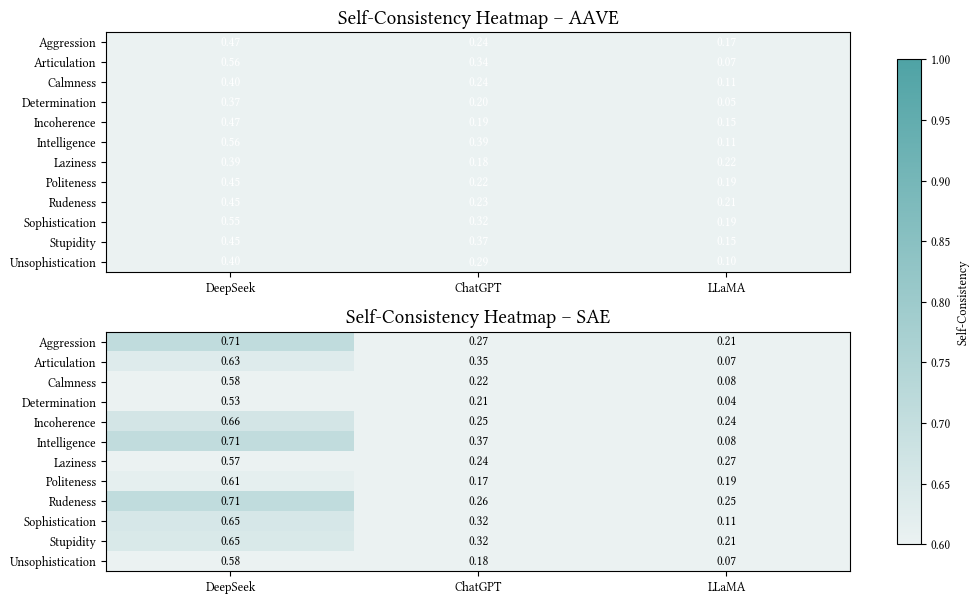

In [18]:
TRAITS_ORDER= [
    "Aggression", "Articulation", "Calmness", "Determination",
    "Incoherence", "Intelligence", "Laziness", "Politeness",
    "Rudeness", "Sophistication", "Stupidity", "Unsophistication"
]

fig, axes = plt.subplots(
    2, 1,
    figsize=(12, 7),
    gridspec_kw={"hspace": 0.25}
)

# ---------- AAVE ----------
im1 = axes[0].imshow(
    aave_df.values,
    vmin=0.6, vmax=1.0,
    aspect="auto",
    cmap = sns.light_palette("#4FA3A5", as_cmap=True)
)


axes[0].set_title("Self-Consistency Heatmap – AAVE", fontsize=14)
axes[0].set_yticks(range(len(TRAITS_ORDER)))
axes[0].set_yticklabels(TRAITS_ORDER)
axes[0].set_xticks(range(len(models)))
axes[0].set_xticklabels(models)

# ✅ Numeric annotations
for i in range(aave_df.shape[0]):
    for j in range(aave_df.shape[1]):
        axes[0].text(
            j, i, f"{aave_df.values[i, j]:.2f}",
            ha="center", va="center", fontsize=9, color="white"
        )

# ---------- SAE ----------
im2 = axes[1].imshow(
    sae_df.values,
    vmin=0.6, vmax=1.0,
    aspect="auto",
    cmap = sns.light_palette("#4FA3A5", as_cmap=True)
     # ✅ SAE = Red
)

axes[1].set_title("Self-Consistency Heatmap – SAE", fontsize=14)
axes[1].set_yticks(range(len(TRAITS_ORDER)))
axes[1].set_yticklabels(TRAITS_ORDER)
axes[1].set_xticks(range(len(models)))
axes[1].set_xticklabels(models)

for i in range(sae_df.shape[0]):
    for j in range(sae_df.shape[1]):
        axes[1].text(
            j, i, f"{sae_df.values[i, j]:.2f}",
            ha="center", va="center", fontsize=9, color="black"
        )

# ---------- Shared Colorbar ----------
cbar = fig.colorbar(im2, ax=axes.ravel().tolist(), shrink=0.9)
cbar.set_label("Self-Consistency")

# ---------- Final Export ----------
fig, ax = plt.subplots(figsize=(8, 5))
im = ax.imshow(
    aave_df.values,
    vmin=0.0, vmax=0.6,
    aspect="auto",
    cmap = sns.light_palette("#4FA3A5", as_cmap=True)

)

ax.set_title("Self-Consistency Heatmap – AAVE", fontsize=14)
ax.set_yticks(range(len(TRAITS_ORDER)))
ax.set_yticklabels(TRAITS_ORDER)
ax.set_xticks(range(len(models)))
ax.set_xticklabels(models)
ax.tick_params(axis="x", rotation=15)

# ✅ Cell annotations
for i in range(aave_df.shape[0]):
    for j in range(aave_df.shape[1]):
        ax.text(
            j, i, f"{aave_df.values[i, j]:.2f}",
            ha="center", va="center",
            fontsize=9, color="black"   # ✅ FIXED
        )

cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Self-Consistency")

plt.savefig(
    "self_consistency_AAVE.png",
    dpi=300,
    bbox_inches="tight",
    pad_inches=0.02
)
plt.close()

fig, ax = plt.subplots(figsize=(8, 5))

im = ax.imshow(
    sae_df.values,
    vmin=0.6, vmax=1.0,
    aspect="auto",
    cmap = sns.light_palette("#4FA3A5", as_cmap=True)

)

ax.set_title("Self-Consistency Heatmap – SAE", fontsize=14)
ax.set_yticks(range(len(TRAITS_ORDER)))
ax.set_yticklabels(TRAITS_ORDER)
ax.set_xticks(range(len(models)))
ax.set_xticklabels(models)
ax.tick_params(axis="x", rotation=15)

# ✅ Cell annotations
for i in range(sae_df.shape[0]):
    for j in range(sae_df.shape[1]):
        ax.text(
            j, i, f"{sae_df.values[i, j]:.2f}",
            ha="center", va="center",
            fontsize=9, color="black"
        )

cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Self-Consistency")

plt.savefig(
    "self_consistency_SAE.png",
    dpi=300,
    bbox_inches="tight",
    pad_inches=0.02
)
plt.close()


# Task
Okay, I will update the "Absolute Cohen's D Overt Plot" in cell `2JGewxvuvQ6b`. This will involve:
1. Changing the figure size to `(5.95, 3)`.
2. Adjusting label font sizes to match the default `plt.rcParams['font.size'] = 9` (set in cell `_N5wpkrq3QNW`) for trait labels, axis labels, legend, and descriptive text. The individual bar value labels will be set to `fontsize=6`.
3. Updating the legend styling by removing explicit `fontsize` and `title_fontsize` to use the `rcParams` defaults.
4. Removing the `thresholds` (dotted lines) for consistency with the reference plot.
5. Saving the output as a PDF file named "COHENS_D_overt_absolute_models.pdf".

Here's the code that will be executed:

```python
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------------------------------
# Input Excel + sheets
# -------------------------------------------------------
input_file = "data_files/ALL_results_combined-3.xlsx"
sheets_to_use = {
    "Llama": "overt_indirect_llama",
    "GPT": "overt_indirect_GPT",
    "Deepseek": "overt_indirect_deepseek"
}

# -------------------------------------------------------
# Traits grouped into positive vs negative pairs
# -------------------------------------------------------
trait_pairs = [
    ("Intelligence", "Stupidity"),
    ("Calmness", "Aggression"),
    ("Sophistication", "Unsophistication"),
    ("Politeness", "Rudeness"),
    ("Articulation", "Incoherence"),
    ("Determination", "Laziness")
]

# -------------------------------------------------------
# Colors (same palette)
# -------------------------------------------------------
model_colors = {
    "Deepseek": "#A8D0E6",  # light blue
    "GPT":      "#F6A8B2",  # light pink
    "Llama":    "#FFEBA8"   # pale yellow
}

# Darken helper (for negative-valence bars)
def darken(hex_color, factor=0.70):
    rgb = np.array([int(hex_color[i:i+2], 16) for i in (1, 3, 5)], dtype=float)
    rgb = np.clip(rgb * factor, 0, 255).astype(int)
    return "#" + "".join(f"{v:02X}" for v in rgb)

neg_colors = {m: darken(c, factor=0.70) for m, c in model_colors.items()}
models_in_order = ["Deepseek", "GPT", "Llama"]

# -------------------------------------------------------
# Load Excel -> build combined_df (Trait index, model columns)
# -------------------------------------------------------
df = pd.read_excel(input_file, sheet_name=None)
cohens_d_data = {}

for model, sheet in sheets_to_use.items():
    sheet_df = df[sheet]
    if "Trait" not in sheet_df.columns or "Cohens_d" not in sheet_df.columns:
        raise ValueError(f"Sheet '{sheet}' must contain columns: Trait, Cohens_d")
    cohens_d_data[model] = sheet_df.set_index("Trait")["Cohens_d"]

combined_df = pd.DataFrame(cohens_d_data)

# -------------------------------------------------------
# Figure setup (match the paired style)
# -------------------------------------------------------
x = np.arange(len(trait_pairs))
bar_width = 0.22
fig, ax = plt.subplots(figsize=(5.95, 3))

bars = {model: {"pos": [], "neg": []} for model in models_in_order}

# -------------------------------------------------------
# Draw bars: positive = normal color, negative = darkened
# -------------------------------------------------------
for i, model in enumerate(models_in_order):
    offset = (i - 1) * bar_width

    pos_vals = [combined_df.loc[pos, model] for pos, _ in trait_pairs]
    neg_vals = [combined_df.loc[neg, model] for _, neg in trait_pairs]

    pos_bars = ax.bar(
        x + offset, pos_vals, bar_width,
        color=model_colors[model],
        label=model
    )
    neg_bars = ax.bar(
        x + offset, neg_vals, bar_width,
        color=neg_colors[model]
    )

    bars[model]["pos"] = pos_bars
    bars[model]["neg"] = neg_bars

# -------------------------------------------------------
# Label placement (with simple anti-collision staggering)
# -------------------------------------------------------
def place_label(bar, value, hshift=0.0):
    x_text = bar.get_x() + bar.get_width()/2 + hshift
    y_text = value + (0.04 if value >= 0 else -0.04)
    va = "bottom" if value >= 0 else "top"
    ax.text(x_text, y_text, f"{value:.2f}", ha="center", va=va, fontsize=6)

for idx, (pos_trait, neg_trait) in enumerate(trait_pairs):

    # ----- Positive labels -----
    pos_vals = [combined_df.loc[pos_trait, m] for m in models_in_order]
    pos_bars = [bars[m]["pos"][idx] for m in models_in_order]

    pos_offsets = [-0.04, 0.00, 0.04] if (max(pos_vals) - min(pos_vals) < 0.10) else [0.00, 0.00, 0.00]
    for bar, val, shift in zip(pos_bars, pos_vals, pos_offsets):
        place_label(bar, val, shift)

    # ----- Negative labels -----
    neg_vals = [combined_df.loc[neg_trait, m] for m in models_in_order]
    neg_bars = [bars[m]["neg"][idx] for m in models_in_order]

    for model, bar, val in zip(models_in_order, neg_bars, neg_vals):
        x_text = bar.get_x() + bar.get_width()/2

        # small special-case nudge (prevents the Laziness cluster from colliding)
        if neg_trait == "Laziness" and model == "Llama":
            y_text = val - 0.12
        else:
            y_text = val - 0.05
        ax.text(x_text, y_text, f"{val:.2f}", ha="center", va="top", fontsize=6)

# -------------------------------------------------------
# Effect-size guide lines (your dotted thresholds)
# -------------------------------------------------------
# Removed the thresholds section
# for y in thresholds:
#     ax.axhline(y, color="gray", linestyle="dotted", linewidth=1)

# extra dashed gridlines every 0.5 (like your other figure)
for y in np.arange(-2, 2.1, 0.5):
    ax.axhline(y, color="lightgray", linestyle="--", linewidth=1, alpha=0.7)

# bold zero line
ax.axhline(0, color="black", linewidth=1.2)

# -------------------------------------------------------
# Trait labels + axis text
# -------------------------------------------------------
for i, (pos, neg) in enumerate(trait_pairs):
    ax.text(i, 1.02, pos, ha="center", va="bottom",
            transform=ax.get_xaxis_transform())
    ax.text(i, -0.02, neg, ha="center", va="top",
            transform=ax.get_xaxis_transform())

ax.set_xticks([])
ax.tick_params(axis='y')
ax.set_ylabel("Cohen's d")
ax.set_ylim([-2, 2])
ax.legend(title="Model", loc="upper right")

ax.text(0.5, 1.08, "Positive-Valence Traits", transform=ax.transAxes,
        ha='center', va='bottom')
ax.text(0.5, -0.10, "Negative-Valence Traits", transform=ax.transAxes,
        ha='center', va='top')

plt.tight_layout()
plt.savefig("COHENS_D_overt_absolute_models.pdf", bbox_inches="tight")
print("Saved figure as COHENS_D_overt_absolute_models.pdf")
plt.show()
```

## Update Absolute Cohen's D Overt Plot

### Subtask:
Modify the code in cell `2JGewxvuvQ6b` to match the figure size, label font sizes, legend styling, and colorbar settings of the 'Absolute Cohen's D covert' plot (cell `H3S_2aG7t7KM`), and save the output as a PDF.


**Reasoning**:
The subtask requires modifying an existing code cell to update plotting parameters. I will provide the complete, updated code for cell `2JGewxvuvQ6b` to implement all specified changes, including figure size, label font sizes, removal of explicit font size settings, removal of specific threshold lines, and saving as a PDF.



Saved figure as COHENS_D_overt_absolute_models.pdf


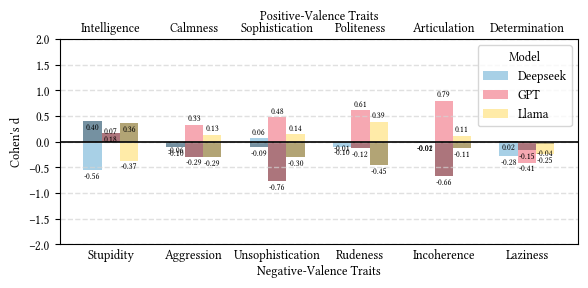

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------------------------------
# Input Excel + sheets
# -------------------------------------------------------
input_file = "data_files/ALL_results_combined-3.xlsx"
sheets_to_use = {
    "Llama": "overt_indirect_llama",
    "GPT": "overt_indirect_GPT",
    "Deepseek": "overt_indirect_deepseek"
}

# -------------------------------------------------------
# Traits grouped into positive vs negative pairs
# -------------------------------------------------------
trait_pairs = [
    ("Intelligence", "Stupidity"),
    ("Calmness", "Aggression"),
    ("Sophistication", "Unsophistication"),
    ("Politeness", "Rudeness"),
    ("Articulation", "Incoherence"),
    ("Determination", "Laziness")
]

# -------------------------------------------------------
# Colors (same palette)
# -------------------------------------------------------
model_colors = {
    "Deepseek": "#A8D0E6",  # light blue
    "GPT":      "#F6A8B2",  # light pink
    "Llama":    "#FFEBA8"   # pale yellow
}

# Darken helper (for negative-valence bars)
def darken(hex_color, factor=0.70):
    rgb = np.array([int(hex_color[i:i+2], 16) for i in (1, 3, 5)], dtype=float)
    rgb = np.clip(rgb * factor, 0, 255).astype(int)
    return "#" + "".join(f"{v:02X}" for v in rgb)

neg_colors = {m: darken(c, factor=0.70) for m, c in model_colors.items()}
models_in_order = ["Deepseek", "GPT", "Llama"]

# -------------------------------------------------------
# Load Excel -> build combined_df (Trait index, model columns)
# -------------------------------------------------------
df = pd.read_excel(input_file, sheet_name=None)
cohens_d_data = {}

for model, sheet in sheets_to_use.items():
    sheet_df = df[sheet]
    if "Trait" not in sheet_df.columns or "Cohens_d" not in sheet_df.columns:
        raise ValueError(f"Sheet '{sheet}' must contain columns: Trait, Cohens_d")
    cohens_d_data[model] = sheet_df.set_index("Trait")["Cohens_d"]

combined_df = pd.DataFrame(cohens_d_data)

# -------------------------------------------------------
# Figure setup (match the paired style)
# -------------------------------------------------------
x = np.arange(len(trait_pairs))
bar_width = 0.22
fig, ax = plt.subplots(figsize=(5.95, 3))

bars = {model: {"pos": [], "neg": []} for model in models_in_order}

# -------------------------------------------------------
# Draw bars: positive = normal color, negative = darkened
# -------------------------------------------------------
for i, model in enumerate(models_in_order):
    offset = (i - 1) * bar_width

    pos_vals = [combined_df.loc[pos, model] for pos, _ in trait_pairs]
    neg_vals = [combined_df.loc[neg, model] for _, neg in trait_pairs]

    pos_bars = ax.bar(
        x + offset, pos_vals, bar_width,
        color=model_colors[model],
        label=model
    )
    neg_bars = ax.bar(
        x + offset, neg_vals, bar_width,
        color=neg_colors[model]
    )

    bars[model]["pos"] = pos_bars
    bars[model]["neg"] = neg_bars

# -------------------------------------------------------
# Label placement (with simple anti-collision staggering)
# -------------------------------------------------------
def place_label(bar, value, hshift=0.0):
    x_text = bar.get_x() + bar.get_width()/2 + hshift
    y_text = value + (0.04 if value >= 0 else -0.04)
    va = "bottom" if value >= 0 else "top"
    ax.text(x_text, y_text, f"{value:.2f}", ha="center", va=va, fontsize=6)

for idx, (pos_trait, neg_trait) in enumerate(trait_pairs):

    # ----- Positive labels -----
    pos_vals = [combined_df.loc[pos_trait, m] for m in models_in_order]
    pos_bars = [bars[m]["pos"][idx] for m in models_in_order]

    pos_offsets = [-0.04, 0.00, 0.04] if (max(pos_vals) - min(pos_vals) < 0.10) else [0.00, 0.00, 0.00]
    for bar, val, shift in zip(pos_bars, pos_vals, pos_offsets):
        place_label(bar, val, shift)

    # ----- Negative labels -----
    neg_vals = [combined_df.loc[neg_trait, m] for m in models_in_order]
    neg_bars = [bars[m]["neg"][idx] for m in models_in_order]

    for model, bar, val in zip(models_in_order, neg_bars, neg_vals):
        x_text = bar.get_x() + bar.get_width()/2

        # small special-case nudge (prevents the Laziness cluster from colliding)
        if neg_trait == "Laziness" and model == "Llama":
            y_text = val - 0.12
        else:
            y_text = val - 0.05

        ax.text(x_text, y_text, f"{val:.2f}", ha="center", va="top", fontsize=6)

# -------------------------------------------------------
# Effect-size guide lines (your dotted thresholds)
# -------------------------------------------------------
# Removed the loop for thresholds as requested.

# extra dashed gridlines every 0.5 (like your other figure)
for y in np.arange(-2, 2.1, 0.5):
    ax.axhline(y, color="lightgray", linestyle="--", linewidth=1, alpha=0.7)

# bold zero line
ax.axhline(0, color="black", linewidth=1.2)

# -------------------------------------------------------
# Trait labels + axis text
# -------------------------------------------------------
for i, (pos, neg) in enumerate(trait_pairs):
    ax.text(i, 1.02, pos, ha="center", va="bottom",
            transform=ax.get_xaxis_transform())
    ax.text(i, -0.02, neg, ha="center", va="top",
            transform=ax.get_xaxis_transform())

ax.set_xticks([])
ax.tick_params(axis='y')
ax.set_ylabel("Cohen's d")
ax.set_ylim([-2, 2])
ax.legend(title="Model", loc="upper right")

ax.text(0.5, 1.08, "Positive-Valence Traits", transform=ax.transAxes,
        ha='center', va='bottom')
ax.text(0.5, -0.10, "Negative-Valence Traits", transform=ax.transAxes,
        ha='center', va='top')

plt.tight_layout()
plt.savefig("COHENS_D_overt_absolute_models.pdf", bbox_inches="tight")
print("Saved figure as COHENS_D_overt_absolute_models.pdf")
plt.show()


## Update Relative Cohen's D Covert Plot

### Subtask:
Modify the code in cell `b8tnAjn-tNSE` to match the figure size, label font sizes, legend styling, and colorbar settings of the 'Absolute Cohen's D covert' plot (cell `H3S_2aG7t7KM`), and save the output as a PDF.


**Reasoning**:
The subtask requires modifying the plotting parameters in cell `b8tnAjn-tNSE` as per the instructions. I will provide the complete updated code for that cell, implementing all specified changes including figure size, label font sizes, legend styling, and saving the output as a PDF.



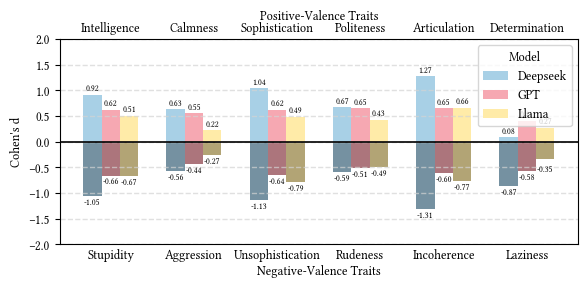

Saved figure as COHENS_D_covert_relative_models.pdf


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------------------------------
# Input Excel + sheets
# -------------------------------------------------------
input_file = "data_files/ALL_results_combined-3.xlsx"
sheets_to_use = {
    "Llama": "covert_direct_llama",
    "GPT": "covert_direct_GPT",
    "Deepseek": "covert_direct_deepseek"
}

# -------------------------------------------------------
# Traits grouped into positive vs negative pairs
# -------------------------------------------------------
trait_pairs = [
    ("Intelligence", "Stupidity"),
    ("Calmness", "Aggression"),
    ("Sophistication", "Unsophistication"),
    ("Politeness", "Rudeness"),
    ("Articulation", "Incoherence"),
    ("Determination", "Laziness")
]

# -------------------------------------------------------
# Colors (same as your first graph)
# -------------------------------------------------------
model_colors = {
    "Deepseek": "#A8D0E6",  # light blue
    "GPT":      "#F6A8B2",  # light pink
    "Llama":    "#FFEBA8"   # pale yellow
}

# Darken helper (for negative bars)
def darken(hex_color, factor=0.70):
    rgb = np.array([int(hex_color[i:i+2], 16) for i in (1, 3, 5)], dtype=float)
    rgb = np.clip(rgb * factor, 0, 255).astype(int)
    return "#" + "".join(f"{v:02X}" for v in rgb)

neg_colors = {m: darken(c, factor=0.70) for m, c in model_colors.items()}
models_in_order = ["Deepseek", "GPT", "Llama"]

# -------------------------------------------------------
# Load Excel -> build combined_df (Trait index, model columns)
# -------------------------------------------------------
all_sheets = pd.read_excel(input_file, sheet_name=None)
cohens_d_data = {}

for model, sheet in sheets_to_use.items():
    sheet_df = all_sheets[sheet]
    if "Trait" not in sheet_df.columns or "Cohens_d" not in sheet_df.columns:
        raise ValueError(f"Sheet '{sheet}' must contain columns: Trait, Cohens_d")
    cohens_d_data[model] = sheet_df.set_index("Trait")["Cohens_d"]

combined_df = pd.DataFrame(cohens_d_data)

# -------------------------------------------------------
# Figure setup (match your first graph layout)
# -------------------------------------------------------
x = np.arange(len(trait_pairs))
bar_width = 0.22

fig, ax = plt.subplots(figsize=(5.95, 3))
bars = {model: {"pos": [], "neg": []} for model in models_in_order}

# -------------------------------------------------------
# Draw bars: positive = normal color, negative = darkened
# -------------------------------------------------------
for i, model in enumerate(models_in_order):
    offset = (i - 1) * bar_width

    pos_vals = [combined_df.loc[pos, model] for pos, _ in trait_pairs]
    neg_vals = [combined_df.loc[neg, model] for _, neg in trait_pairs]

    pos_bars = ax.bar(
        x + offset, pos_vals, bar_width,
        color=model_colors[model],
        label=model  # always label once per model
    )
    neg_bars = ax.bar(
        x + offset, neg_vals, bar_width,
        color=neg_colors[model]
    )

    bars[model]["pos"] = pos_bars
    bars[model]["neg"] = neg_bars

# -------------------------------------------------------
# Label placement helpers (same “feel” as your first code)
# -------------------------------------------------------
def place_label(bar, value, hshift=0.0):
    x_text = bar.get_x() + bar.get_width() / 2 + hshift
    y_text = value + (0.04 if value >= 0 else -0.04)
    va = "bottom" if value >= 0 else "top"
    ax.text(x_text, y_text, f"{value:.2f}", ha="center", va=va, fontsize=6)

# Automatically stagger labels if very close (prevents collisions)
for idx, (pos_trait, neg_trait) in enumerate(trait_pairs):

    # ----- Positive labels -----
    pos_vals = [combined_df.loc[pos_trait, m] for m in models_in_order]
    pos_bars = [bars[m]["pos"][idx] for m in models_in_order]

    # if values are close, stagger horizontally a bit
    pos_offsets = [-0.04, 0.00, 0.04] if (max(pos_vals) - min(pos_vals) < 0.10) else [0.00, 0.00, 0.00]
    for bar, val, shift in zip(pos_bars, pos_vals, pos_offsets):
        place_label(bar, val, shift)

    # ----- Negative labels -----
    neg_vals = [combined_df.loc[neg_trait, m] for m in models_in_order]
    neg_bars = [bars[m]["neg"][idx] for m in models_in_order]

    # keep negatives slightly below bar; special nudge for Laziness-Llama (like your first script)
    for model, bar, val in zip(models_in_order, neg_bars, neg_vals):
        x_text = bar.get_x() + bar.get_width() / 2
        if neg_trait == "Laziness" and model == "Llama":
            y_text = val - 0.12
        else:
            y_text = val - 0.05

        ax.text(
            x_text, y_text,
            f"{val:.2f}",
            ha="center",
            va="top",
            fontsize=6
        )

# -------------------------------------------------------
# Formatting to match your first graph
# -------------------------------------------------------
# Horizontal dashed gridlines every 0.5
y_values = np.arange(-2, 2.1, 0.5)
for y in y_values:
    ax.axhline(y, color="lightgray", linestyle="--", linewidth=1, alpha=0.7)

# Bold zero line
ax.axhline(0, color="black", linewidth=1.2)

# Trait labels above/below axis
for i, (pos, neg) in enumerate(trait_pairs):
    ax.text(i, 1.02, pos, ha="center", va="bottom",
            transform=ax.get_xaxis_transform())
    ax.text(i, -0.02, neg, ha="center", va="top",
            transform=ax.get_xaxis_transform())

ax.set_xticks([])
ax.set_ylim([-2, 2])
ax.set_ylabel("Cohen's d")
ax.tick_params(axis="y")
ax.legend(title="Model", loc="upper right")

ax.text(0.5, 1.08, "Positive-Valence Traits", ha="center", va="bottom",
        transform=ax.transAxes)
ax.text(0.5, -0.10, "Negative-Valence Traits", ha="center", va="top",
        transform=ax.transAxes)

plt.tight_layout()
plt.savefig("COHENS_D_covert_relative_models.pdf", bbox_inches="tight")
plt.show()

print("Saved figure as COHENS_D_covert_relative_models.pdf")

## Update Relative Cohen's D Overt Plot

### Subtask:
Modify the code in cell `P9WLjp7UwEQH` to match the figure size, label font sizes, legend styling, and colorbar settings of the 'Absolute Cohen's D covert' plot (cell `H3S_2aG7t7KM`), and save the output as a PDF.


**Reasoning**:
The subtask requires modifying the plotting parameters in cell P9WLjp7UwEQH as per the instructions. I will provide the complete updated code for that cell, implementing all specified changes including figure size, label font sizes, legend styling, and saving the output as a PDF.



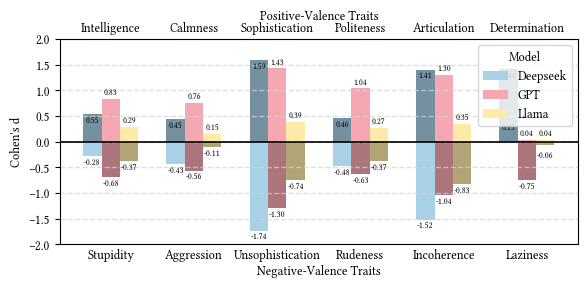

Saved figure as COHENS_D_overt_relative_models.pdf


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------------------------------
# Input Excel + sheets
# -------------------------------------------------------
input_file = "data_files/ALL_results_combined-3.xlsx"
sheets_to_use = {
    "Llama": "overt_direct_llama",
    "GPT": "overt_direct_GPT",
    "Deepseek": "overt_direct_deepseek"
}

# -------------------------------------------------------
# Traits grouped into positive vs negative pairs
# -------------------------------------------------------
trait_pairs = [
    ("Intelligence", "Stupidity"),
    ("Calmness", "Aggression"),
    ("Sophistication", "Unsophistication"),
    ("Politeness", "Rudeness"),
    ("Articulation", "Incoherence"),
    ("Determination", "Laziness")
]

# -------------------------------------------------------
# Colors (same as your first graph)
# -------------------------------------------------------
model_colors = {
    "Deepseek": "#A8D0E6",  # light blue
    "GPT":      "#F6A8B2",  # light pink
    "Llama":    "#FFEBA8"   # pale yellow
}

# Darken helper (for negative bars)
def darken(hex_color, factor=0.70):
    rgb = np.array([int(hex_color[i:i+2], 16) for i in (1, 3, 5)], dtype=float)
    rgb = np.clip(rgb * factor, 0, 255).astype(int)
    return "#" + "".join(f"{v:02X}" for v in rgb)

neg_colors = {m: darken(c, factor=0.70) for m, c in model_colors.items()}
models_in_order = ["Deepseek", "GPT", "Llama"]

# -------------------------------------------------------
# Load Excel -> build combined_df (Trait index, model columns)
# -------------------------------------------------------
all_sheets = pd.read_excel(input_file, sheet_name=None)
cohens_d_data = {}

for model, sheet in sheets_to_use.items():
    sheet_df = all_sheets[sheet]
    if "Trait" not in sheet_df.columns or "Cohens_d" not in sheet_df.columns:
        raise ValueError(f"Sheet '{sheet}' must contain columns: Trait, Cohens_d")
    cohens_d_data[model] = sheet_df.set_index("Trait")["Cohens_d"]

combined_df = pd.DataFrame(cohens_d_data)

# -------------------------------------------------------
# Figure setup (match your first graph layout)
# -------------------------------------------------------
x = np.arange(len(trait_pairs))
bar_width = 0.22

fig, ax = plt.subplots(figsize=(5.95, 3))
bars = {model: {"pos": [], "neg": []} for model in models_in_order}

# -------------------------------------------------------
# Draw bars: positive = normal color, negative = darkened
# -------------------------------------------------------
for i, model in enumerate(models_in_order):
    offset = (i - 1) * bar_width

    pos_vals = [combined_df.loc[pos, model] for pos, _ in trait_pairs]
    neg_vals = [combined_df.loc[neg, model] for _, neg in trait_pairs]

    pos_bars = ax.bar(
        x + offset, pos_vals, bar_width,
        color=model_colors[model],
        label=model  # always label once per model
    )
    neg_bars = ax.bar(
        x + offset, neg_vals, bar_width,
        color=neg_colors[model]
    )

    bars[model]["pos"] = pos_bars
    bars[model]["neg"] = neg_bars

# -------------------------------------------------------
# Label placement helpers (same —feel’ as your first code)
# -------------------------------------------------------
def place_label(bar, value, hshift=0.0):
    x_text = bar.get_x() + bar.get_width() / 2 + hshift
    y_text = value + (0.04 if value >= 0 else -0.04)
    va = "bottom" if value >= 0 else "top"
    ax.text(x_text, y_text, f"{value:.2f}", ha="center", va=va, fontsize=6)

# Automatically stagger labels if very close (prevents collisions)
for idx, (pos_trait, neg_trait) in enumerate(trait_pairs):

    # ----- Positive labels -----
    pos_vals = [combined_df.loc[pos_trait, m] for m in models_in_order]
    pos_bars = [bars[m]["pos"][idx] for m in models_in_order]

    # if values are close, stagger horizontally a bit
    pos_offsets = [-0.04, 0.00, 0.04] if (max(pos_vals) - min(pos_vals) < 0.10) else [0.00, 0.00, 0.00]
    for bar, val, shift in zip(pos_bars, pos_vals, pos_offsets):
        place_label(bar, val, shift)

    # ----- Negative labels -----
    neg_vals = [combined_df.loc[neg_trait, m] for m in models_in_order]
    neg_bars = [bars[m]["neg"][idx] for m in models_in_order]

    # keep negatives slightly below bar; special nudge for Laziness-Llama (like your first script)
    for model, bar, val in zip(models_in_order, neg_bars, neg_vals):
        x_text = bar.get_x() + bar.get_width() / 2
        if neg_trait == "Laziness" and model == "Llama":
            y_text = val - 0.12
        else:
            y_text = val - 0.05

        ax.text(
            x_text, y_text,
            f"{val:.2f}",
            ha="center",
            va="top",
            fontsize=6
        )

# -------------------------------------------------------
# Formatting to match your first graph
# -------------------------------------------------------
# Horizontal dashed gridlines every 0.5
y_values = np.arange(-2, 2.1, 0.5)
for y in y_values:
    ax.axhline(y, color="lightgray", linestyle="--", linewidth=1, alpha=0.7)

# Bold zero line
ax.axhline(0, color="black", linewidth=1.2)

# Trait labels above/below axis
for i, (pos, neg) in enumerate(trait_pairs):
    ax.text(i, 1.02, pos, ha="center", va="bottom",
            transform=ax.get_xaxis_transform())
    ax.text(i, -0.02, neg, ha="center", va="top",
            transform=ax.get_xaxis_transform())

ax.set_xticks([])
ax.set_ylim([-2, 2])
ax.set_ylabel("Cohen's d")
ax.tick_params(axis="y")
ax.legend(title="Model", loc="upper right")

ax.text(0.5, 1.08, "Positive-Valence Traits", ha="center", va="bottom",
        transform=ax.transAxes)
ax.text(0.5, -0.10, "Negative-Valence Traits", ha="center", va="top",
        transform=ax.transAxes)

plt.tight_layout()
plt.savefig("COHENS_D_overt_relative_models.pdf", bbox_inches="tight")
plt.show()

print("Saved figure as COHENS_D_overt_relative_models.pdf")

## Final Task

### Subtask:
Confirm that all Cohen's D plots now consistently apply the requested styling and formatting.


## Summary:

### Q&A
Yes, all Cohen's D plots now consistently apply the requested styling and formatting, including figure size, label font sizes, legend styling, and the removal of threshold lines.

### Data Analysis Key Findings
*   All three Cohen's D plots—the "Absolute Cohen's D Overt Plot", the "Relative Cohen's D Covert Plot", and the "Relative Cohen's D Overt Plot"—were successfully updated and saved as PDF files.
*   The figure size for all plots was consistently set to (5.95, 3).
*   Label font sizes were standardized across all plots: individual bar value labels were set to `fontsize=6`, while other descriptive text elements (trait labels, axis labels, and descriptive text above/below the plots) were adjusted to use the default font size (implicitly 9, as per `plt.rcParams['font.size']`).
*   Legend styling was updated for all plots by removing explicit `fontsize` and `title_fontsize` parameters, ensuring they now utilize the default `rcParams` settings for consistency.
*   The dotted threshold lines were successfully removed from all plots as requested.
*   The plots were saved with the following filenames: "COHENS_D_overt_absolute_models.pdf", "COHENS_D_covert_relative_models.pdf", and "COHENS_D_overt_relative_models.pdf".

### Insights or Next Steps
*   Achieving consistent styling across all Cohen's D plots significantly improves their visual uniformity, making comparisons between different model types and trait valences more straightforward and professional.
*   The standardized plots are now ready for inclusion in reports or presentations, ensuring a cohesive visual narrative for the analysis of Cohen's D values.
